<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#First-pass-fitting" data-toc-modified-id="First-pass-fitting-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>First pass fitting</a></span></li></ul></li><li><span><a href="#Random-Forest-Grid-Search" data-toc-modified-id="Random-Forest-Grid-Search-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Random Forest Grid Search</a></span><ul class="toc-item"><li><span><a href="#Randomized-Search" data-toc-modified-id="Randomized-Search-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Randomized Search</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Grid-search-for-max_depth-only" data-toc-modified-id="Grid-search-for-max_depth-only-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Grid search for max_depth only</a></span></li><li><span><a href="#**-Best-fit-below-**" data-toc-modified-id="**-Best-fit-below-**-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span><strong>** Best fit below **</strong></a></span></li><li><span><a href="#Plot-MSE-vs-Number-of-trees-(n_estimators)" data-toc-modified-id="Plot-MSE-vs-Number-of-trees-(n_estimators)-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Plot MSE vs Number of trees (n_estimators)</a></span></li><li><span><a href="#Plot-MSE-vs-max_depth-of-trees" data-toc-modified-id="Plot-MSE-vs-max_depth-of-trees-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Plot MSE vs max_depth of trees</a></span></li></ul></li><li><span><a href="#XGBOOST" data-toc-modified-id="XGBOOST-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>XGBOOST</a></span><ul class="toc-item"><li><span><a href="#First-pass-fitting" data-toc-modified-id="First-pass-fitting-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>First pass fitting</a></span></li><li><span><a href="#Plot-R^2-vs-Number-of-trees-(n_estimators)" data-toc-modified-id="Plot-R^2-vs-Number-of-trees-(n_estimators)-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Plot R^2 vs Number of trees (n_estimators)</a></span></li><li><span><a href="#Randomized-search" data-toc-modified-id="Randomized-search-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Randomized search</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#**-Best-fit-below-**" data-toc-modified-id="**-Best-fit-below-**-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span><strong>** Best fit below **</strong></a></span></li></ul></li><li><span><a href="#Best-fit-model" data-toc-modified-id="Best-fit-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Best fit model</a></span></li></ul></li><li><span><a href="#Prediction-intervals" data-toc-modified-id="Prediction-intervals-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prediction intervals</a></span></li><li><span><a href="#Residuals-plots" data-toc-modified-id="Residuals-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Residuals plots</a></span></li><li><span><a href="#Extra-material" data-toc-modified-id="Extra-material-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extra material</a></span><ul class="toc-item"><li><span><a href="#PDP/ICE-plots-using-RF-model-(XGBoost-model-dosent-work)" data-toc-modified-id="PDP/ICE-plots-using-RF-model-(XGBoost-model-dosent-work)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>PDP/ICE plots using RF model (XGBoost model dosent work)</a></span><ul class="toc-item"><li><span><a href="#We-have-been-provided-with-the-feature-list-of-100-houses-and-will-apply-our-best-performing-machine-learning-model-to-assign-sale-prices-to-these" data-toc-modified-id="We-have-been-provided-with-the-feature-list-of-100-houses-and-will-apply-our-best-performing-machine-learning-model-to-assign-sale-prices-to-these-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>We have been provided with the feature list of 100 houses and will apply our best performing machine learning model to assign sale prices to these</a></span></li></ul></li></ul></li></ul></div>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
import random
import statsmodels.api as sm
import sklearn.model_selection as ms
import xgboost as xgb
from scipy.stats import uniform, randint
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_log_error, mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

##  Random Forest


In [2]:
#import df
train_undum_df = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Housing_Price_Prediction/Marcus_C/Data/train_undum_df.csv', index_col=0)
test_undum_df = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Housing_Price_Prediction/Marcus_C/Data/test_undum_df.csv', index_col=0)

In [30]:
test_undum_df

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,GarageCond,SaleType,SaleCondition,LotFrontage,LotArea,OverallQual,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageFinish,GarageCars,GarageQual,Total_OutdoorSF,Baths,Age,AgeRemodAdd,AgeGarage
0,0,2,3,3,4,12,1,0,2,1,10,12,2,1,1,5,8,4,80.0,11622,5,0.0,3,3,882.0,3,1,896,3,5,0,1,1.0,3,260,1.0,49,49,49.0
1,0,3,0,3,0,12,2,0,2,3,11,13,1,1,1,5,8,4,81.0,14267,6,108.0,3,3,1329.0,3,1,1329,4,6,0,1,1.0,3,429,2.0,52,52,52.0
2,5,3,0,3,4,8,2,0,4,1,10,12,2,2,1,5,8,4,74.0,13830,5,0.0,3,4,928.0,4,1,1629,3,6,3,3,2.0,3,246,3.0,13,12,13.0
3,5,3,0,3,4,8,2,0,4,1,10,12,1,2,1,5,8,4,78.0,9978,6,20.0,3,3,926.0,5,1,1604,4,7,4,3,2.0,3,396,3.0,12,12,12.0
4,11,3,0,1,4,22,2,4,2,1,6,6,2,2,1,5,8,4,43.0,5005,8,0.0,4,4,1280.0,5,1,1280,4,5,0,2,2.0,3,226,2.0,18,18,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,13,4,3,3,4,10,2,3,4,1,5,5,2,1,6,3,8,4,21.0,1936,4,0.0,3,3,546.0,4,1,1092,3,5,0,0,0.0,0,0,2.0,36,36,0.0
1455,13,4,3,3,4,10,2,4,4,1,5,5,2,1,4,5,8,0,21.0,1894,4,0.0,3,3,546.0,3,1,1092,3,6,0,1,1.0,3,24,2.0,36,36,36.0
1456,0,3,3,3,4,11,2,0,2,1,10,12,2,1,5,5,8,0,160.0,20000,5,0.0,3,3,1224.0,5,1,1224,3,7,3,1,2.0,3,474,2.0,46,10,46.0
1457,9,3,3,3,4,11,2,0,5,1,6,14,2,2,6,3,8,4,62.0,10441,5,0.0,3,4,912.0,3,1,970,3,6,0,0,0.0,0,112,2.0,14,14,0.0


In [10]:
#assign predictor and target variables to undummified datasets

#assign predictor and target variables
yu = train_undum_df['SalePrice'].apply(np.log)
Xu = train_undum_df.drop(["SalePrice"], axis = 1)

#train/test split 
Xu_train, Xu_test, yu_train, yu_test = train_test_split(Xu, yu, test_size = 0.2, random_state = 42)

### First pass fitting

In [32]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(Xu_train, yu_train)

print("Train R^2 score is: %.5f" % (rf.score(Xu_train, yu_train))) 
print("Test R^2 score is: %.5f" % (rf.score(Xu_test, yu_test)))
print("Train error is: %.5f" % (1 - rf.score(Xu_train, yu_train))) 
print("Test error is: %.5f" % (1 - rf.score(Xu_test, yu_test)))
print("RMSE for train: %f" %np.sqrt(mean_squared_error(rf.predict(Xu_train), yu_train)))
print("RMSE for test: %f" %np.sqrt(mean_squared_error(rf.predict(Xu_test), yu_test)))

Train R^2 score is: 0.98117
Test R^2 score is: 0.87998
Train error is: 0.01883
Test error is: 0.12002
RMSE for train: 0.053584
RMSE for test: 0.149655


Text(0, 0.5, 'Predicted Value')

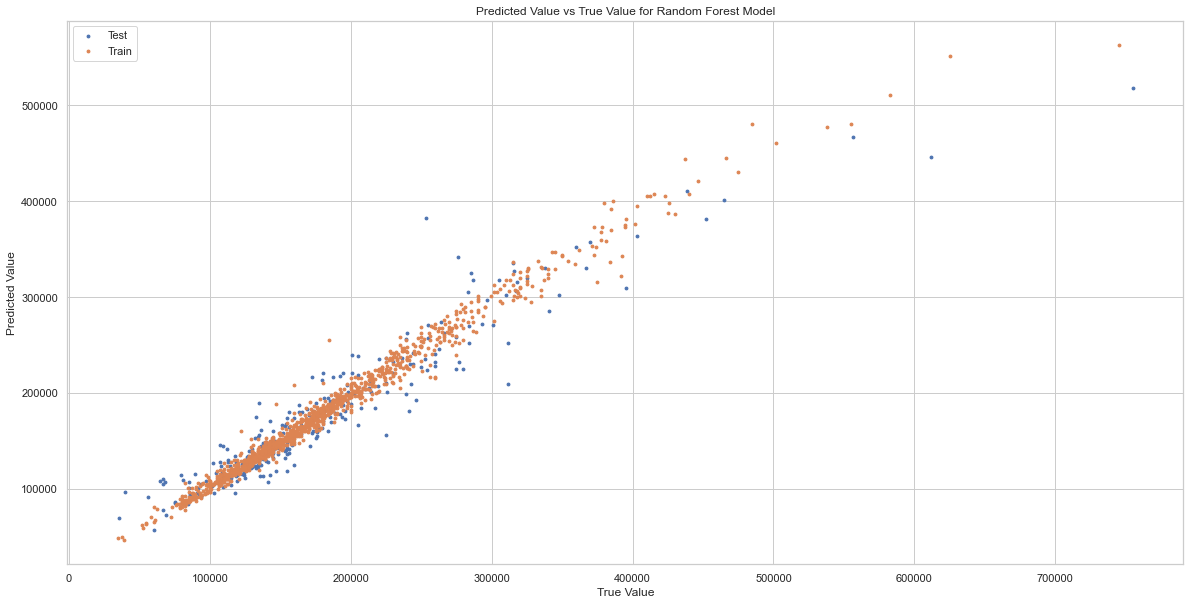

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(x = np.exp(yu_test), y = np.exp(rf.predict(Xu_test)), s = 8, label = "Test")
plt.scatter(x = np.exp(yu_train), y = np.exp(rf.predict(Xu_train)), s = 8, label = "Train")
plt.legend(loc = 0)
plt.title("Predicted Value vs True Value for Random Forest Model")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

## Random Forest Grid Search
### Randomized Search

In [120]:
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Complexity parameter
# ccp_alpha=[0.005, 0.015, 0.03]

grid_para_forest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# run the RF regressor through the grid search
grid_search_forest = ms.RandomizedSearchCV(rf, grid_para_forest, n_iter = 100, verbose=3, random_state=42, scoring='neg_root_mean_squared_error', cv=3, n_jobs= -1)
# not sure which error metric is best
grid_search_forest.fit(Xu_train, yu_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 24.4min finished


CPU times: user 4.73 s, sys: 406 ms, total: 5.14 s
Wall time: 24min 25s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [121]:
grid_search_forest.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [122]:
print("Train R^2 score is: %.5f" % (grid_search_forest.best_estimator_.score(Xu_train, yu_train))) 
print("Test R^2 score is: %.5f" % (grid_search_forest.best_estimator_.score(Xu_test, yu_test)))
print("Train error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(Xu_train, yu_train))) 
print("Test error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(Xu_test, yu_test)))
print("RMSE for train: %f" %np.sqrt(mean_squared_error(grid_search_forest.best_estimator_.predict(Xu_train), yu_train)))
print("RMSE for test: %f" %np.sqrt(mean_squared_error(grid_search_forest.best_estimator_.predict(Xu_test), yu_test)))

Train R^2 score is: 0.99553
Test R^2 score is: 0.87810
Train error is: 0.00447
Test error is: 0.12190
RMSE for train: 0.026105
RMSE for test: 0.150826


### Grid Search

In [34]:
rf6 = RandomForestRegressor()
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'],
    'min_samples_split': [2,3],
    'max_depth': [20,25,30],
    'n_estimators': [200,300,400,500],
    'min_samples_leaf':[1,2],
    'max_leaf_nodes':[None],
    'max_samples': [None],
    'bootstrap': [False],
    'max_features': ['sqrt', 8, 15, 20],
    'ccp_alpha': [0.00,0.02],
    'random_state' :[42]
}

# run the RF regressor through the grid search
grid_search_forest = ms.GridSearchCV(rf6, grid_para_forest, scoring='neg_root_mean_squared_error', cv=5, n_jobs= -1, verbose=4)
grid_search_forest.fit(Xu_train, yu_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 31.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'ccp_alpha': [0.0, 0.02],
                         'criterion': ['mse'], 'max_depth': [20, 25, 30],
                         'max_features': ['sqrt', 8, 15, 20],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [42]},
             scoring='neg_root_mean_squared_error', verbose=4)

In [35]:
grid_search_forest.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500,
 'random_state': 42}

In [36]:
print("Train R^2 score is: %.5f" % (grid_search_forest.best_estimator_.score(Xu_train, yu_train))) 
print("Test R^2 score is: %.5f" % (grid_search_forest.best_estimator_.score(Xu_test, yu_test)))
print("Train error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(Xu_train, yu_train))) 
print("Test error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(Xu_test, yu_test)))
print("RMSE for train: %f" %np.sqrt(mean_squared_error(grid_search_forest.best_estimator_.predict(Xu_train), yu_train)))
print("RMSE for test: %f" %np.sqrt(mean_squared_error(grid_search_forest.best_estimator_.predict(Xu_test), yu_test)))

Train R^2 score is: 0.99934
Test R^2 score is: 0.87862
Train error is: 0.00066
Test error is: 0.12138
RMSE for train: 0.010002
RMSE for test: 0.150505


### Grid search for max_depth only
### **** Best fit below ****

In [41]:
rf6 = RandomForestRegressor()
# set the parameter grid
grid_para_forest = {
    'criterion': ['mse'],
    'min_samples_split': [2],
    'max_depth': [4,5,6,7,8,10],
    'n_estimators': [500],
    'min_samples_leaf':[1],
    'max_leaf_nodes':[None],
    'max_samples': [None],
    'bootstrap': [False],
    'max_features': [8],
    'ccp_alpha': [0.00],
    'random_state' :[42]
}

# run the RF regressor through the grid search
grid_search_forest = ms.GridSearchCV(rf6, grid_para_forest, scoring='neg_root_mean_squared_error', cv=5, n_jobs= -1, verbose=4)
# not sure which error metric is best
grid_search_forest.fit(Xu_train, yu_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.1s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'ccp_alpha': [0.0],
                         'criterion': ['mse'], 'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [8], 'max_leaf_nodes': [None],
                         'max_samples': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [500],
                         'random_state': [42]},
             scoring='neg_root_mean_squared_error', verbose=4)

In [42]:
grid_search_forest.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 8,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 42}

In [43]:
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=10, max_features=8,
                      n_estimators=500, random_state=42)

In [44]:
print("Train R^2 score is: %.5f" % (grid_search_forest.best_estimator_.score(Xu_train, yu_train))) 
print("Test R^2 score is: %.5f" % (grid_search_forest.best_estimator_.score(Xu_test, yu_test)))
print("Train error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(Xu_train, yu_train))) 
print("Test error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(Xu_test, yu_test)))
print("RMSE for train: %f" %np.sqrt(mean_squared_error(grid_search_forest.best_estimator_.predict(Xu_train), yu_train)))
print("RMSE for test: %f" %np.sqrt(mean_squared_error(grid_search_forest.best_estimator_.predict(Xu_test), yu_test)))

Train R^2 score is: 0.98933
Test R^2 score is: 0.88078
Train error is: 0.01067
Test error is: 0.11922
RMSE for train: 0.040331
RMSE for test: 0.149159


In [45]:
pd.DataFrame(grid_search_forest.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.721034,0.022992,0.116048,0.012274,False,0,mse,4,8,None,None,1,2,500,42,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",-0.158827,-0.167105,-0.201277,-0.173325,-0.140934,-0.168293,0.019762,6
1,1.833100,0.012347,0.102924,0.001910,False,0,mse,5,8,None,None,1,2,500,42,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",-0.150836,-0.157935,-0.187291,-0.160772,-0.130583,-0.157483,0.018261,5
2,1.945870,0.072356,0.101348,0.005311,False,0,mse,6,8,None,None,1,2,500,42,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",-0.144274,-0.153738,-0.176245,-0.150697,-0.124462,-0.149883,0.016662,4
3,2.055806,0.022470,0.108915,0.014642,False,0,mse,7,8,None,None,1,2,500,42,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",-0.139575,-0.151973,-0.169350,-0.144555,-0.119714,-0.145034,0.016190,3
4,2.265260,0.032595,0.107561,0.004760,False,0,mse,8,8,None,None,1,2,500,42,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",-0.138529,-0.150332,-0.166227,-0.141884,-0.116546,-0.142704,0.016210,2
5,2.367178,0.353997,0.095406,0.015052,False,0,mse,10,8,None,None,1,2,500,42,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",-0.135796,-0.148142,-0.163134,-0.137870,-0.114595,-0.139907,0.015932,1


In [46]:
grid_search_forest.score(Xu_train, yu_train)

-0.040330857694740846

### Plot MSE vs Number of trees (n_estimators)

In [340]:
rf = RandomForestRegressor(n_estimators=1)
mse_train=[]
mse_test=[]
for iter in range(50):
    rf.fit(Xu_train, yu_train)
    yu_train_predicted = rf.predict(Xu_train)
    yu_test_predicted = rf.predict(Xu_test)
    mse_train.append( mean_squared_error(yu_train, yu_train_predicted))
    mse_test.append( mean_squared_error(yu_test, yu_test_predicted))
    rf.n_estimators += 10
    

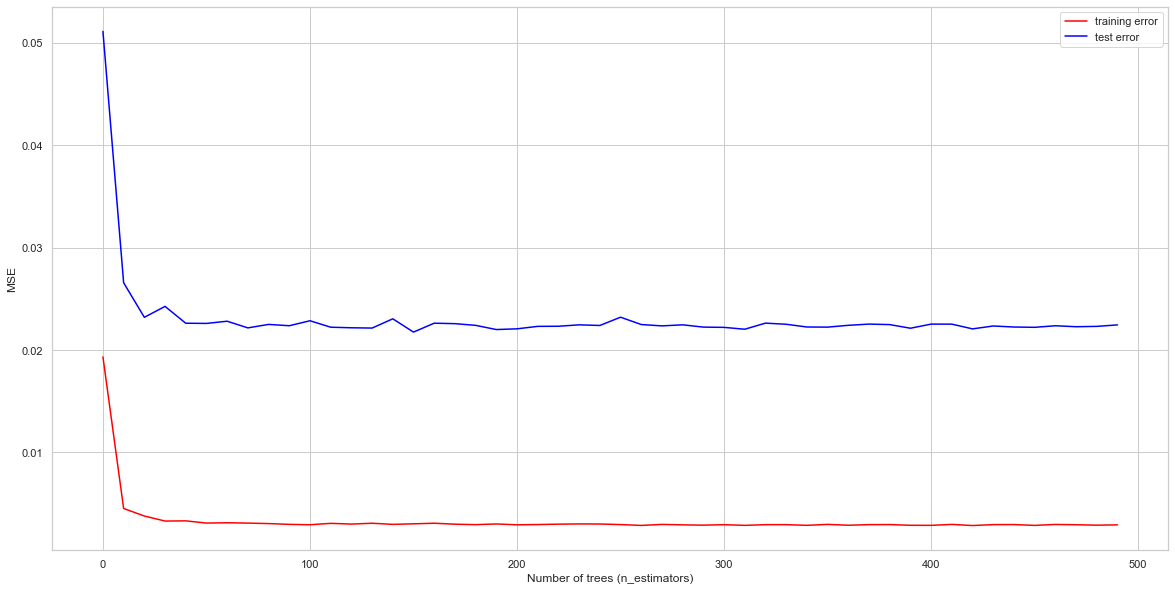

In [344]:
plt.plot(range(0,500,10), mse_train, c='red', label='training error')
plt.plot(range(0,500,10), mse_test, c='blue', label='test error')
plt.ylabel('MSE')
plt.xlabel('Number of trees (n_estimators)')
plt.legend()
plt.show()

### Plot MSE vs max_depth of trees

In [345]:
rf = RandomForestRegressor(bootstrap=False, max_depth=1, max_features=8,
                      n_estimators=500, random_state=42, min_samples_leaf= 1, min_samples_split= 2)
mse_train=[]
mse_test=[]
for iter in range(50):
    rf.fit(Xu_train, yu_train)
    yu_train_predicted = rf.predict(Xu_train)
    yu_test_predicted = rf.predict(Xu_test)
    mse_train.append( mean_squared_error(yu_train, yu_train_predicted))
    mse_test.append( mean_squared_error(yu_test, yu_test_predicted))
    rf.max_depth += 1
    

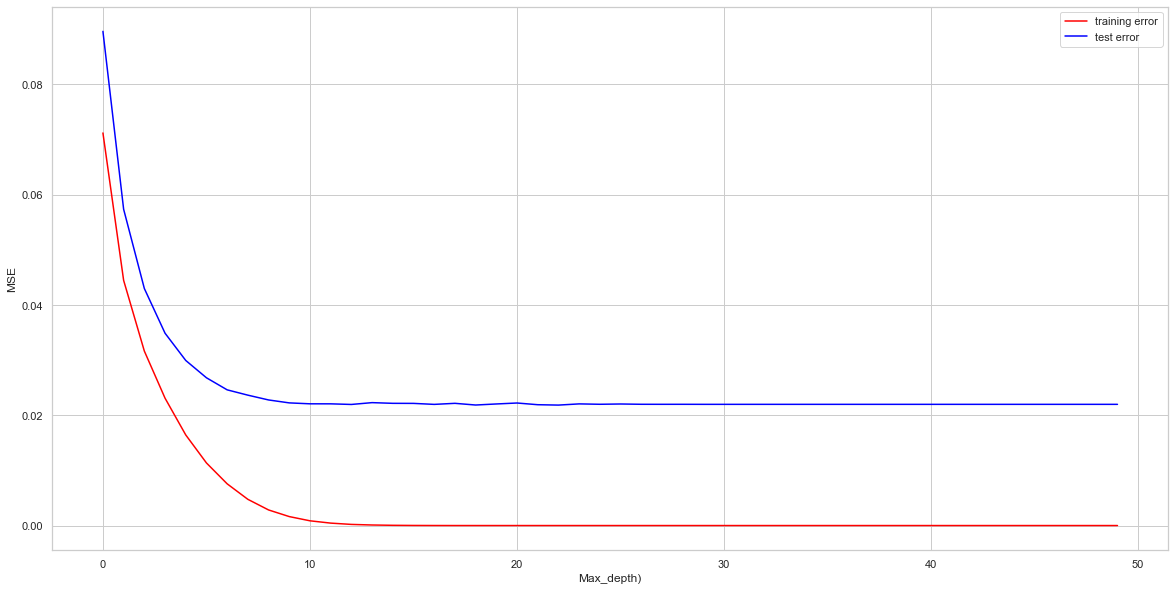

In [346]:
plt.plot(range(0,50), mse_train, c='red', label='training error')
plt.plot(range(0,50), mse_test, c='blue', label='test error')
plt.ylabel('MSE')
plt.xlabel('Max_depth')
plt.legend()
plt.show()

## XGBOOST
### First pass fitting

In [4]:
import xgboost as xgb

In [219]:
xmodel=xgb.XGBRegressor(random_state=1)
xmodel.fit(Xu_train, yu_train)

print("Train R^2 score is: %.5f" % (xmodel.score(Xu_train, yu_train))) 
print("Test R^2 score is: %.5f" % (xmodel.score(Xu_test, yu_test)))
print("Train error is: %.5f" % (1 - xmodel.score(Xu_train, yu_train))) 
print("Test error is: %.5f" % (1 - xmodel.score(Xu_test, yu_test)))
print("RMSE for train: %f" %np.sqrt(mean_squared_error(xmodel.predict(Xu_train), yu_train)))
print("RMSE for test: %f" %np.sqrt(mean_squared_error(xmodel.predict(Xu_test), yu_test)))

Train R^2 score is: 0.99920
Test R^2 score is: 0.88700
Train error is: 0.00080
Test error is: 0.11300
RMSE for train: 0.011021
RMSE for test: 0.145215


### Plot R^2 vs Number of trees (n_estimators)

In [318]:
xmodel=xgb.XGBRegressor()
# para =(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.1, max_delta_step=0, max_depth=5,
#              min_child_weight=1, missing=nan, monotone_constraints='()',
#              n_estimators=i, n_jobs=-1, nthread=-1, num_parallel_tree=1,
#              random_state=1, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
#              subsample=0.5, tree_method='exact', validate_parameters=1,
#              verbosity=None)

train_score=[]
test_score=[]
ne = range(50, 500, 10)

for i in ne:
    if i%100==0: print('n_estimators= %0f'%i)
    xmodel.set_params(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1,
             n_estimators=i, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             random_state=1, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
             subsample=0.5, tree_method='exact', validate_parameters=1,
             verbosity=1)
    xmodel.fit(Xu_train, yu_train)
    train_score.append(xmodel.score(Xu_train, yu_train))
    test_score.append(xmodel.score(Xu_test, yu_test))


n_estimators= 100.000000
n_estimators= 200.000000
n_estimators= 300.000000
n_estimators= 400.000000


<Figure size 1440x720 with 0 Axes>

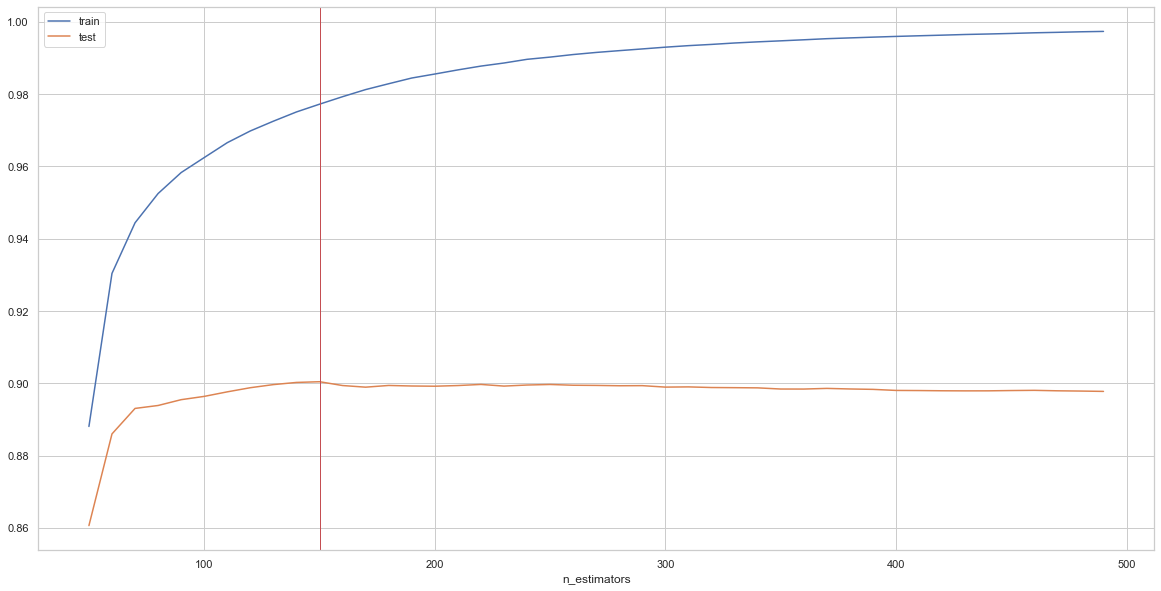

In [337]:
scores_=pd.DataFrame({'n_estimators':ne,'train':train_score, 'test':test_score})
plt.figure()
scores_.plot(x='n_estimators')
plt.axvline(x=150, linewidth=1, color='r')
plt.show()

### Randomized search

In [240]:
xmodel=xgb.XGBRegressor(nthread= -1)
# set the parameter grid
grid_para = {'min_child_weight': randint(1, 6), # default = 1
             'gamma': uniform(0, 0.5), # default = 0
             "learning_rate": uniform(0, 1), #  default=0.3
             'subsample': uniform(0.2, 1.0), # default =1 
             'colsample_bytree': uniform(0.5, 1.0), # default =1 
             'max_depth': randint(2, 6), # default =6
             "n_estimators": randint(100, 150),
             'random_state' :[1]
}

# run the RF regressor through the search
grid_search_xmodel = ms.RandomizedSearchCV(xmodel, grid_para, scoring='neg_root_mean_squared_error', n_iter=200, cv=3, n_jobs= -1, verbose=4)
grid_search_xmodel.fit(Xu_train, yu_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   21.2s finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16fe4a8b0>,
                                        'min_child_weight': <scipy.s

In [241]:
grid_search_xmodel.best_params_

{'colsample_bytree': 0.5068372986822091,
 'gamma': 0.05531579866610942,
 'learning_rate': 0.07756296308864119,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 137,
 'random_state': 1,
 'subsample': 0.305869643423303}

In [242]:
print("Train R^2 score is: %.5f" % (grid_search_xmodel.best_estimator_.score(Xu_train, yu_train))) 
print("Test R^2 score is: %.5f" % (grid_search_xmodel.best_estimator_.score(Xu_test, yu_test)))
print("Train error is: %.5f" % (1 - grid_search_xmodel.best_estimator_.score(Xu_train, yu_train))) 
print("Test error is: %.5f" % (1 - grid_search_xmodel.best_estimator_.score(Xu_test, yu_test)))
print("RMSE for train: %f" %np.sqrt(mean_squared_error(grid_search_xmodel.best_estimator_.predict(Xu_train), yu_train)))
print("RMSE for test: %f" %np.sqrt(mean_squared_error(grid_search_xmodel.best_estimator_.predict(Xu_test), yu_test)))

Train R^2 score is: 0.92524
Test R^2 score is: 0.90460
Train error is: 0.07476
Test error is: 0.09540
RMSE for train: 0.106753
RMSE for test: 0.133431


### Grid Search
### **** Best fit below ****

In [8]:
xmodel=xgb.XGBRegressor(nthread= -1,gpu_id=-1)
# set the parameter grid
grid_para = {'min_child_weight': [1,2], # default = 1
             'gamma': [0, 0.025, 0.055, 0.075], # default = 0
             'reg_alpha': [0], # default = 0
             "learning_rate": [0.05, 0.078, 0.1], #  default=0.3
             'subsample': [0.2,0.3,0.4], # default =1 
             'colsample_bytree': [0.4, 0.5, 0.6], # default =1 
             'max_depth': [2,3,4], # default =6
             "n_estimators": [100,125,137,150],
             'random_state' :[1]
}

# run the XGB regressor through the grid search
grid_search_xmodel = ms.GridSearchCV(xmodel, grid_para, scoring='neg_root_mean_squared_error', cv=5, n_jobs= -1, verbose=4)
grid_search_xmodel.fit(Xu_train, yu_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [17]:
grid_search_xmodel.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.055,
 'learning_rate': 0.078,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 150,
 'random_state': 1,
 'reg_alpha': 0,
 'subsample': 0.3}

In [18]:
print("Train R^2 score is: %.5f" % (grid_search_xmodel.best_estimator_.score(Xu_train, yu_train))) 
print("Test R^2 score is: %.5f" % (grid_search_xmodel.best_estimator_.score(Xu_test, yu_test)))
print("Train error is: %.5f" % (1 - grid_search_xmodel.best_estimator_.score(Xu_train, yu_train))) 
print("Test error is: %.5f" % (1 - grid_search_xmodel.best_estimator_.score(Xu_test, yu_test)))
print("RMSE for train: %f" %np.sqrt(mean_squared_error(grid_search_xmodel.best_estimator_.predict(Xu_train), yu_train)))
print("RMSE for test: %f" %np.sqrt(mean_squared_error(grid_search_xmodel.best_estimator_.predict(Xu_test), yu_test)))

Train R^2 score is: 0.93997
Test R^2 score is: 0.90835
Train error is: 0.06003
Test error is: 0.09165
RMSE for train: 0.095659
RMSE for test: 0.130780


## Best fit model

In [9]:
xmodel=xgb.XGBRegressor(colsample_bytree= 0.6,
 gamma= 0.055,
 learning_rate= 0.078,
 max_depth= 4,
 min_child_weight= 1,
 n_estimators= 150,
 random_state= 1,
 reg_alpha= 0,
 subsample= 0.3)
xmodel.fit(Xu_train, yu_train)

print("Train R^2 score is: %.5f" % (xmodel.score(Xu_train, yu_train))) 
print("Test R^2 score is: %.5f" % (xmodel.score(Xu_test, yu_test)))
print("Train error is: %.5f" % (1 - xmodel.score(Xu_train, yu_train))) 
print("Test error is: %.5f" % (1 - xmodel.score(Xu_test, yu_test)))
print("RMSE for train: %f" %np.sqrt(mean_squared_error(xmodel.predict(Xu_train), yu_train)))
print("RMSE for test: %f" %np.sqrt(mean_squared_error(xmodel.predict(Xu_test), yu_test)))

Train R^2 score is: 0.93997
Test R^2 score is: 0.90835
Train error is: 0.06003
Test error is: 0.09165
RMSE for train: 0.095659
RMSE for test: 0.130780


In [6]:
np.exp(.133)

1.1422499983308942

# Prediction intervals
https://towardsdatascience.com/how-to-generate-prediction-intervals-with-scikit-learn-and-python-ab3899f992ed

In [8]:
# Set lower and upper quantile
LOWER_ALPHA = 0.05
UPPER_ALPHA = 0.95
# Each model has to be separate
lower_model = xgb.XGBRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = xgb.XGBRegressor(loss="ls")
upper_model = xgb.XGBRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)

In [11]:
# Fit models
lower_model.fit(Xu_train, yu_train)
mid_model.fit(Xu_train, yu_train)
upper_model.fit(Xu_train, yu_train)
# Record actual values on test set
predictions = pd.DataFrame(yu_test)
# Predict
predictions['lower'] = lower_model.predict(Xu_test)
predictions['mid'] = mid_model.predict(Xu_test)
predictions['upper'] = upper_model.predict(Xu_test)

[00:50:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { loss } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:50:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { loss } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:50:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { loss } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
 

In [23]:
predictions=np.exp(predictions)

In [24]:

def calculate_error(predictions):
    """
    Calculate the absolute error associated with prediction intervals
    
    :param predictions: dataframe of predictions
    :return: None, modifies the prediction dataframe
    
    """
    predictions['absolute_error_lower'] = (predictions['lower'] - predictions["SalePrice"]).abs()
    predictions['absolute_error_upper'] = (predictions['upper'] - predictions["SalePrice"]).abs()
    
    predictions['absolute_error_interval'] = (predictions['absolute_error_lower'] + predictions['absolute_error_upper']) / 2
    predictions['absolute_error_mid'] = (predictions['mid'] - predictions["SalePrice"]).abs()
    
    predictions['in_bounds'] = predictions["SalePrice"].between(left=predictions['lower'], right=predictions['upper'])

In [25]:

calculate_error(predictions)
metrics = predictions[['absolute_error_lower', 'absolute_error_upper', 'absolute_error_interval', 'absolute_error_mid', 'in_bounds']].copy()
metrics.describe()

,absolute_error_lower,absolute_error_upper,absolute_error_interval,absolute_error_mid
count,292.000000,292.000000,292.000000,292.000000
mean,17369.398839,18183.500281,17776.449560,17483.935306
std,19289.315979,22469.353679,20150.890350,23890.053230
min,91.562500,17.320313,523.632812,59.671875
25%,5234.371094,5458.007813,6194.744141,5416.347656
50%,11356.078125,12236.269531,11642.296875,11900.328125
75%,22514.773437,23655.488281,22377.807617,21514.230469
max,135123.500000,234167.281250,184645.390625,284215.937500


# Residuals plots

In [500]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

In [ ]:
## Residuals plot Random Forest model

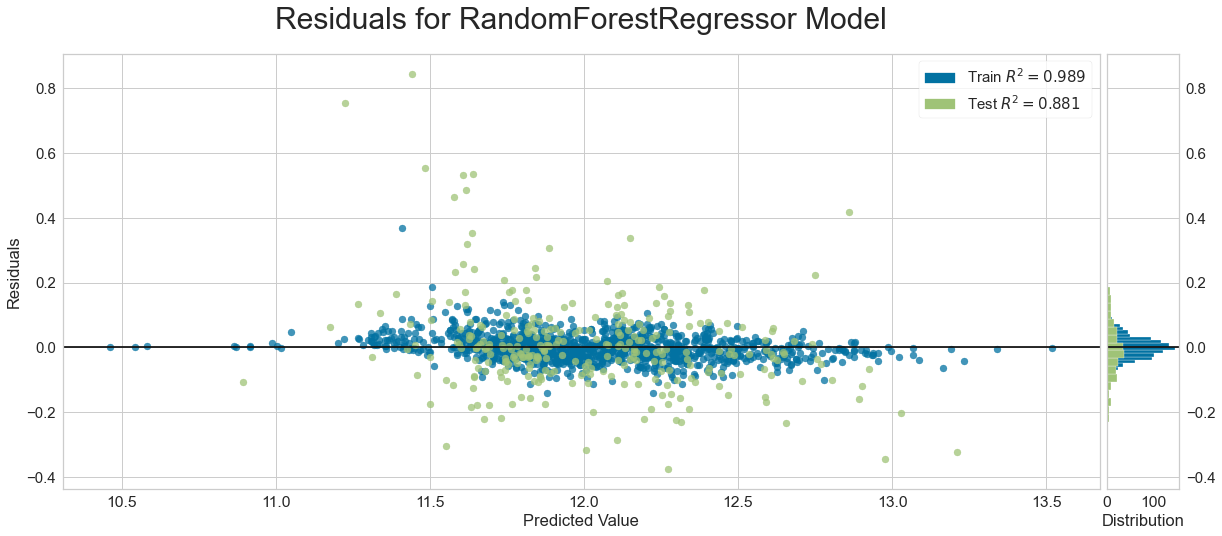

In [506]:

visualizer = ResidualsPlot(rfx)

visualizer.fit(Xu_train, yu_train)  # Fit the training data to the visualizer
visualizer.score(Xu_test, yu_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [ ]:
## Residuals plot XGBoost model

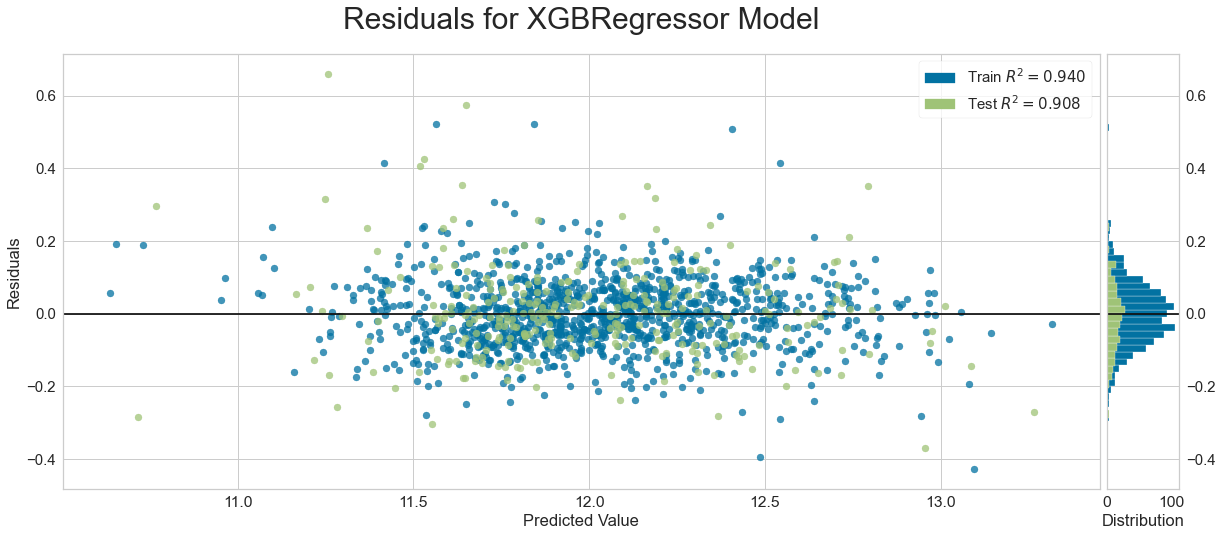

In [507]:

visualizer = ResidualsPlot(xmodel)

visualizer.fit(Xu_train, yu_train)  # Fit the training data to the visualizer
visualizer.score(Xu_test, yu_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Extra material
## PDP/ICE plots using RF model (XGBoost model dosent work)

In [505]:
size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size*1.0,
          'axes.titlesize': size*2,
          'axes.labelsize': size*1.1,
          'xtick.labelsize': size*1.05,
          'ytick.labelsize': size*1.0,
          'axes.titlepad': 25,
          'figure.titlesize': size*2,
          'legend.fontsize': size,
            'legend.title_fontsize': size}

plt.rcParams.update(params)

sns.set_style("whitegrid")

In [3]:
from sklearn.inspection import plot_partial_dependence

In [3]:
import sklearn
print(sklearn.__version__)

0.23.2


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.6s finished


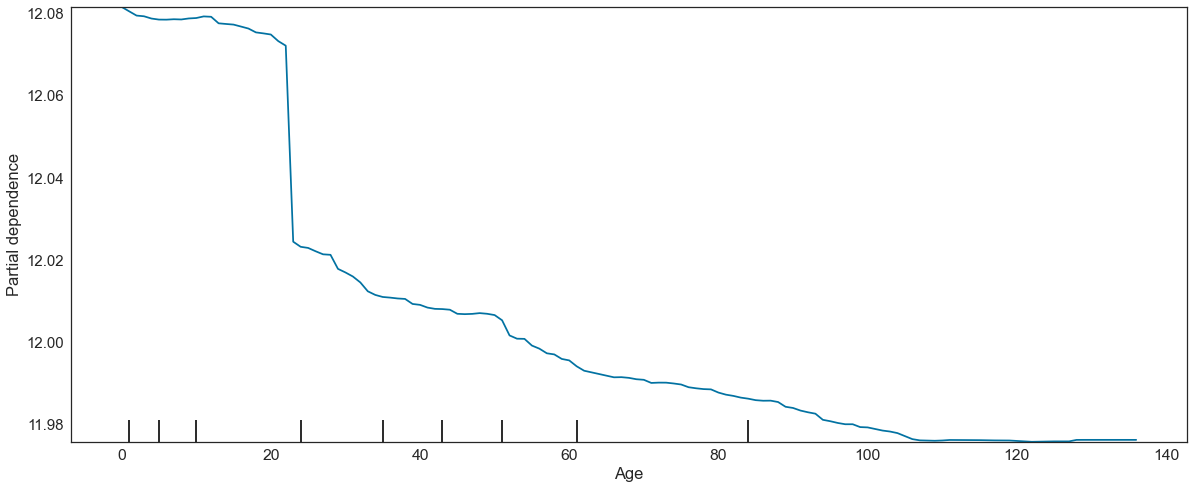

In [511]:
rfx=RandomForestRegressor(bootstrap=False,
 ccp_alpha= 0.0,
 criterion= 'mse',
 max_depth= 10,
 max_features= 8,
 max_leaf_nodes= None,
 max_samples= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 500,
 random_state= 42).fit(Xu_train, yu_train)

sns.set_style("ticks") #style must be one of white, dark, whitegrid, darkgrid, ticks
plot_partial_dependence(rfx, Xu_train, ['Age'],  verbose=4, n_jobs=-1 ,grid_resolution=300)

In [509]:
xmodel=xgb.XGBRegressor(colsample_bytree= 0.6,
 gamma= 0.055,
 learning_rate= 0.078,
 max_depth= 4,
 min_child_weight= 1,
 n_estimators= 150,
 random_state= 1,
 reg_alpha= 0,
 subsample= 0.3)
xmodel.fit(Xu_train, yu_train)

plot_partial_dependence(xmodel, Xu_train, ['Age'],  verbose=4, n_jobs=-1 ,grid_resolution=300, method='brute') #

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


NotFittedError: This XGBRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [26]:
## list of tuples of neighborhoods and corresponding labelencoding number
## from Pre-Processing_RKedit.ipynb

listNeighborhoods= [(13, 'NPkVill'),
 (1, 'Blueste'),
 (0, 'Blmngtn'),
 (12, 'NAmes'),
 (11, 'Mitchel'),
 (7, 'Edwards'),
 (19, 'Sawyer'),
 (8, 'Gilbert'),
 (9, 'IDOTRR'),
 (5, 'CollgCr'),
 (16, 'NridgHt'),
 (6, 'Crawfor'),
 (14, 'NWAmes'),
 (18, 'SWISU'),
 (3, 'BrkSide'),
 (15, 'NoRidge'),
 (23, 'Timber'),
 (10, 'MeadowV'),
 (2, 'BrDale'),
 (24, 'Veenker'),
 (20, 'SawyerW'),
 (21, 'Somerst'),
 (22, 'StoneBr'),
 (4, 'ClearCr'),
 (17, 'OldTown')]

# sort by number in place
listNeighborhoods.sort(key=lambda t: t[0])
listNeighborhoods

[(0, 'Blmngtn'),
 (1, 'Blueste'),
 (2, 'BrDale'),
 (3, 'BrkSide'),
 (4, 'ClearCr'),
 (5, 'CollgCr'),
 (6, 'Crawfor'),
 (7, 'Edwards'),
 (8, 'Gilbert'),
 (9, 'IDOTRR'),
 (10, 'MeadowV'),
 (11, 'Mitchel'),
 (12, 'NAmes'),
 (13, 'NPkVill'),
 (14, 'NWAmes'),
 (15, 'NoRidge'),
 (16, 'NridgHt'),
 (17, 'OldTown'),
 (18, 'SWISU'),
 (19, 'Sawyer'),
 (20, 'SawyerW'),
 (21, 'Somerst'),
 (22, 'StoneBr'),
 (23, 'Timber'),
 (24, 'Veenker')]

In [104]:
[x[1] for x in listNeighborhoods]

['Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker']

In [32]:
# manual PDP:
# https://lmc2179.github.io/posts/pdp.html

nei_values=range(0,25)
pdp_values = []
for n in nei_values:
  X_pdp = Xu_train.copy()
  X_pdp['Neighborhood'] = n
  pdp_values.append(np.mean(rfx.predict(X_pdp)))

#sns.barplot(nei_values, pdp_values)
plt.ylim(np.exp(12.023), np.exp(12.0375))
plt.axhline(np.exp(np.mean(rfx.predict(Xu_train))), color='r',linestyle='dashed')
plt.bar(nei_values, np.exp(pdp_values))
plt.xticks(nei_values, [x[1] for x in listNeighborhoods], rotation=45)
plt.ylabel('Predicted house price')
plt.xlabel('Neighborhood')
plt.title('Partial dependence plot for Neighborhood against Predicted House Proce for Random Forest Model')
plt.show()

NameError: name 'rfx' is not defined

In [31]:
# manual PDP: for RANDOM FOREST
# https://lmc2179.github.io/posts/pdp.html

nei_values=range(0,25)
pdp_values = []
for n in nei_values:
  X_pdp = Xu_train.copy()
  X_pdp['Neighborhood'] = n
  pdp_values.append(np.mean(rfx.predict(X_pdp)))

NameError: name 'rfx' is not defined

In [152]:
nei_dist= [('far', 'Blmngtn'),
 ('mid', 'Blueste'),
 ('near', 'BrDale'),
 ('near', 'BrkSide'),
 ('near', 'ClearCr'),
 ('mid', 'CollgCr'),
 ('near', 'Crawfor'),
 ('near', 'Edwards'),
 ('far', 'Gilbert'),
 ('near', 'IDOTRR'),
 ('far', 'MeadowV'),
 ('far', 'Mitchel'),
 ('mid', 'NAmes'),
 ('far', 'NPkVill'),
 ('mid', 'NWAmes'),
 ('far', 'NoRidge'),
 ('far', 'NridgHt'),
 ('mid', 'OldTown'),
 ('near', 'SWISU'),
 ('near', 'Sawyer'),
 ('mid', 'SawyerW'),
 ('mid', 'Somerst'),
 ('far', 'StoneBr'),
 ('far', 'Timber'),
 ('near', 'Veenker')]

pdp_nei_df= pd.DataFrame({'Neighborhood':[x[1] for x in listNeighborhoods],
                          'Distance_ISU':[x[0] for x in nei_dist],
                          'Neighborhood_num':nei_values, 
                          'Pdp':np.exp(pdp_values) })

Text(0.5, 1.0, 'Partial dependence plot for Neighborhood against Predicted House Proce for Random Forest Model')

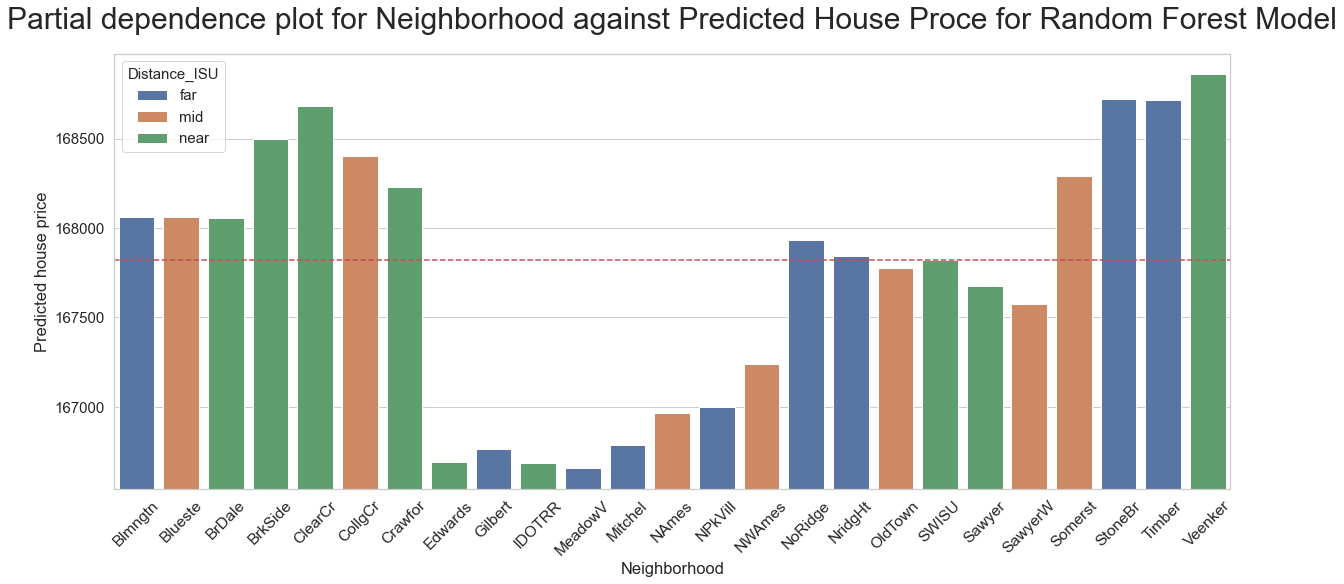

In [162]:
sns.barplot(x='Neighborhood', y='Pdp', data=pdp_nei_df, hue='Distance_ISU', dodge=False)
plt.ylim(np.exp(12.023), np.exp(12.0375))
plt.axhline(np.exp(np.mean(rfx.predict(Xu_train))), color='r',linestyle='dashed')
# plt.bar(nei_values, np.exp(pdp_values))
plt.xticks(nei_values, [x[1] for x in listNeighborhoods], rotation=45)
plt.ylabel('Predicted house price')
plt.xlabel('Neighborhood')
plt.title('Partial dependence plot for Neighborhood against Predicted House Price for Random Forest Model')
#plt.show()

In [78]:
# manual PDP: FOR XGBoost
# https://lmc2179.github.io/posts/pdp.html

nei_values=range(0,25)
pdp_values = []
for n in nei_values:
  X_pdp = Xu_train.copy()
  X_pdp['Neighborhood'] = n
  pdp_values.append(np.mean(xmodel.predict(X_pdp)))

In [79]:
nei_dist= [('far', 'Blmngtn'),
 ('mid', 'Blueste'),
 ('near', 'BrDale'),
 ('near', 'BrkSide'),
 ('near', 'ClearCr'),
 ('mid', 'CollgCr'),
 ('near', 'Crawfor'),
 ('near', 'Edwards'),
 ('far', 'Gilbert'),
 ('near', 'IDOTRR'),
 ('far', 'MeadowV'),
 ('far', 'Mitchel'),
 ('mid', 'NAmes'),
 ('far', 'NPkVill'),
 ('mid', 'NWAmes'),
 ('far', 'NoRidge'),
 ('far', 'NridgHt'),
 ('mid', 'OldTown'),
 ('near', 'SWISU'),
 ('near', 'Sawyer'),
 ('mid', 'SawyerW'),
 ('mid', 'Somerst'),
 ('far', 'StoneBr'),
 ('far', 'Timber'),
 ('near', 'Veenker')]

pdp_nei_df= pd.DataFrame({'Neighborhood':[x[1] for x in listNeighborhoods],
                          'Distance_ISU':[x[0] for x in nei_dist],
                          'Neighborhood_num':nei_values, 
                          'Pdp':np.exp(pdp_values) })

In [80]:
nei_order = pdp_nei_df.sort_values('Distance_ISU', ascending=False).reset_index(drop=True)['Neighborhood']

In [291]:
nei_order.values

array(['Veenker', 'BrDale', 'BrkSide', 'ClearCr', 'Crawfor', 'Edwards',
       'IDOTRR', 'Sawyer', 'SWISU', 'NWAmes', 'Somerst', 'SawyerW',
       'OldTown', 'NAmes', 'Blueste', 'CollgCr', 'NPkVill', 'NoRidge',
       'NridgHt', 'Mitchel', 'MeadowV', 'Gilbert', 'StoneBr', 'Timber',
       'Blmngtn'], dtype=object)

In [36]:
nei_order_corr=['BrDale', 'BrkSide', 'ClearCr', 'Crawfor', 'Edwards','IDOTRR', 'Sawyer', 'SWISU','Veenker', 
                'Blueste', 'CollgCr', 'NAmes','NWAmes','OldTown', 'SawyerW', 'Somerst',
       'Blmngtn', 'Gilbert','Mitchel', 'MeadowV','NoRidge','NPkVill','NridgHt', 'StoneBr', 'Timber'
       ]
nei_order_corr_near= ['BrDale', 'BrkSide', 'ClearCr', 'Crawfor', 'Edwards','IDOTRR', 'Sawyer', 'SWISU','Veenker']
nei_order_corr_mid= ['Blueste', 'CollgCr', 'NAmes','NWAmes','OldTown', 'SawyerW', 'Somerst']
nei_order_corr_far= ['Blmngtn', 'Gilbert','Mitchel', 'MeadowV','NoRidge','NPkVill','NridgHt', 'StoneBr', 'Timber']

In [76]:
pdp_nei_df

NameError: name 'pdp_nei_df' is not defined

In [27]:
pdp_avg_near= pdp_nei_df[pdp_nei_df["Neighborhood"].isin(nei_order.corr_near)]['Pdp'].mean()
pdp_avg_mid= pdp_nei_df[pdp_nei_df["Neighborhood"].isin(nei_order.corr_mid)]['Pdp'].mean()
pdp_avg_far= pdp_nei_df[pdp_nei_df["Neighborhood"].isin(nei_order.corr_far)]['Pdp'].mean()

NameError: name 'pdp_nei_df' is not defined

Text(0.5, 1.0, 'Partial dependence plot for Neighborhood against Predicted House Price for XGBoost Model')

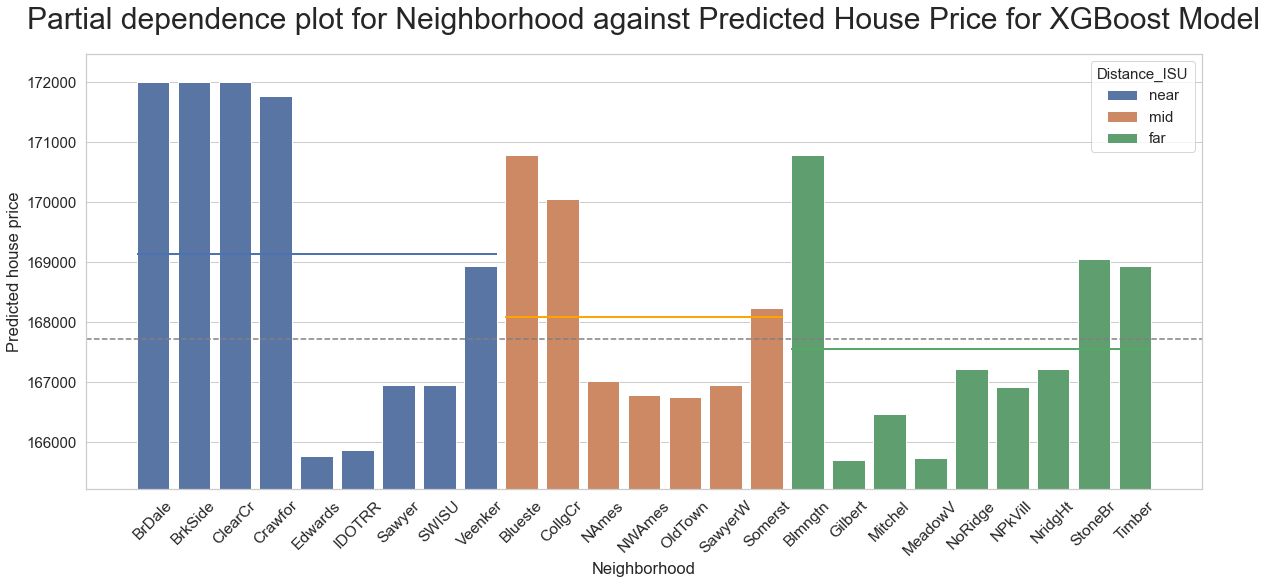

In [323]:
sns.barplot(x='Neighborhood', y='Pdp', data=pdp_nei_df, hue='Distance_ISU', dodge=False, hue_order=["near", "mid","far"],
           order=nei_order_corr)
plt.ylim(np.exp(12.015), np.exp(12.058))
plt.axhline(np.exp(np.mean(xmodel.predict(Xu_train))), color='gray',linestyle='dashed')
plt.hlines(y=pdp_avg_near, xmin=-0.4, xmax=8.4,color='b',linestyle='solid',linewidth=2)
plt.hlines(y=pdp_avg_mid, xmin=8.6, xmax=15.4,color='orange',linestyle='solid',linewidth=2)
plt.hlines(y=pdp_avg_far, xmin=15.6, xmax=24.4,color='g',linestyle='solid',linewidth=2)
plt.xticks(nei_values, nei_order.corr, rotation=45)
plt.ylabel('Predicted house price')
plt.xlabel('Neighborhood')
plt.title('Partial dependence plot for Neighborhood against Predicted House Price for XGBoost Model')
#plt.show()

In [82]:
pdp_nei_df=pdp_nei_df.sort_values('Neighborhood')

In [86]:
size=17
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,9),
          'axes.titlesize': size*2,
          'axes.labelsize': size*1.1,
          'xtick.labelsize': size*1.1,
          'ytick.labelsize': size*1.1,
          'axes.titlepad': 25,
          'figure.titlesize': size*2,
          'legend.fontsize': size,
            'legend.title_fontsize': size}

plt.rcParams.update(params)

sns.set_style("whitegrid")

In [ ]:
train = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Kaggle_DS/house-prices-advanced-regression-techniques/train.csv')
train_sort= train.groupby('Neighborhood')['SalePrice'].mean().sort_values()

Text(0.5, 1.0, 'Partial dependence plot for Neighborhood against Predicted House Price for XGBoost Model')

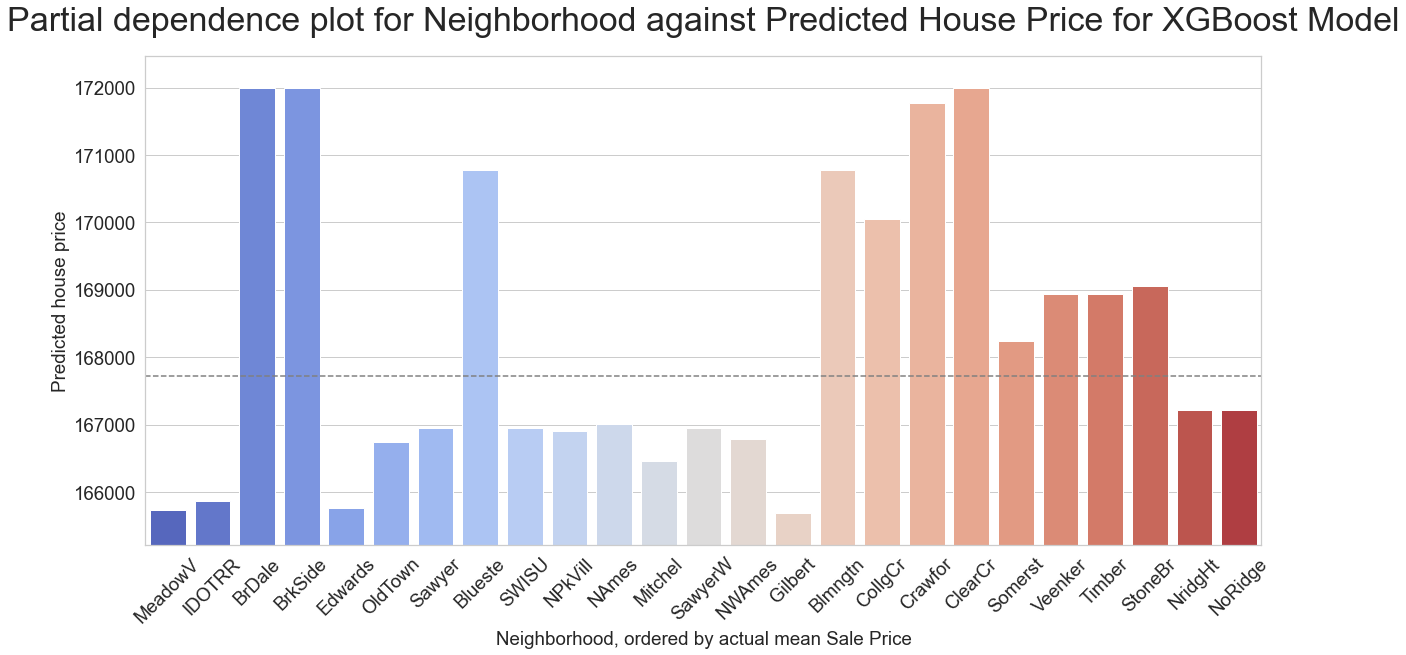

In [109]:
sns.barplot(x='Neighborhood', y='Pdp', data=pdp_nei_df, order=train_sort.index, palette='coolwarm')
plt.ylim(np.exp(12.015), np.exp(12.058))
plt.axhline(np.exp(np.mean(xmodel.predict(Xu_train))), color='gray',linestyle='dashed')
# plt.hlines(y=pdp_avg_near, xmin=-0.4, xmax=8.4,color='b',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_mid, xmin=8.6, xmax=15.4,color='orange',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_far, xmin=15.6, xmax=24.4,color='g',linestyle='solid',linewidth=2)
plt.xticks( rotation=45)
plt.ylabel('Predicted house price')
plt.xlabel('Neighborhood, ordered by actual mean Sale Price')
plt.title('Partial dependence plot for Neighborhood against Predicted House Price for XGBoost Model')
#plt.show()

In [115]:
range(0, np.max(X_pdp['Age']))

range(0, 136)

In [484]:
# manual PDP: FOR XGBoost
# https://lmc2179.github.io/posts/pdp.html

#nei_values=range(0, np.max(ages))
pdp_values = []
for n in Xu_train['Age']:
  X_pdp = Xu_train.copy()
  X_pdp['Age'] = n
  pdp_values.append(np.mean(rfx.predict(X_pdp)))

In [485]:
age_df= pd.DataFrame({'Age':Xu_train['Age'], 'Pdp':np.exp(pdp_values)})

Text(0.5, 1.0, 'Partial dependence plot for Age against Predicted House Price for Random Forest Model')

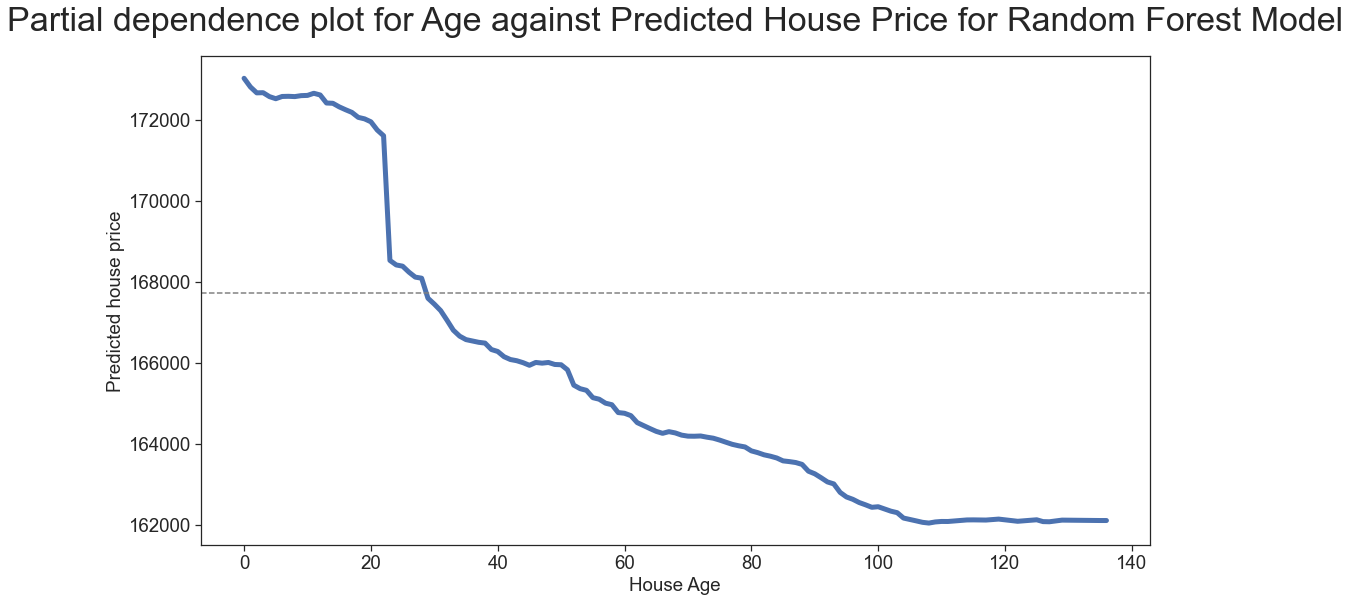

In [489]:
sns.lineplot(x='Age', y='Pdp', data=age_df, linewidth=5)
#plt.ylim(np.exp(12.015), np.exp(12.058))
plt.axhline(np.exp(np.mean(xmodel.predict(Xu_train))), color='gray',linestyle='dashed')
# plt.hlines(y=pdp_avg_near, xmin=-0.4, xmax=8.4,color='b',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_mid, xmin=8.6, xmax=15.4,color='orange',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_far, xmin=15.6, xmax=24.4,color='g',linestyle='solid',linewidth=2)
plt.ylabel('Predicted house price')
plt.xlabel('House Age')
plt.title('Partial dependence plot for Age against Predicted House Price for Random Forest Model')
#plt.show()

In [479]:
# manual PDP: FOR XGBoost
# https://lmc2179.github.io/posts/pdp.html

#nei_values=range(0, np.max(ages))
pdp_values = []
for n in Xu_train['Age']:
  X_pdp = Xu_train.copy()
  X_pdp['Age'] = n
  pdp_values.append(np.mean(xmodel.predict(X_pdp)))

In [480]:
age_df= pd.DataFrame({'Age':Xu_train['Age'], 'Pdp':np.exp(pdp_values)})

Text(0.5, 1.0, 'Partial dependence plot for Age against Predicted House Price for XGBoost Model')

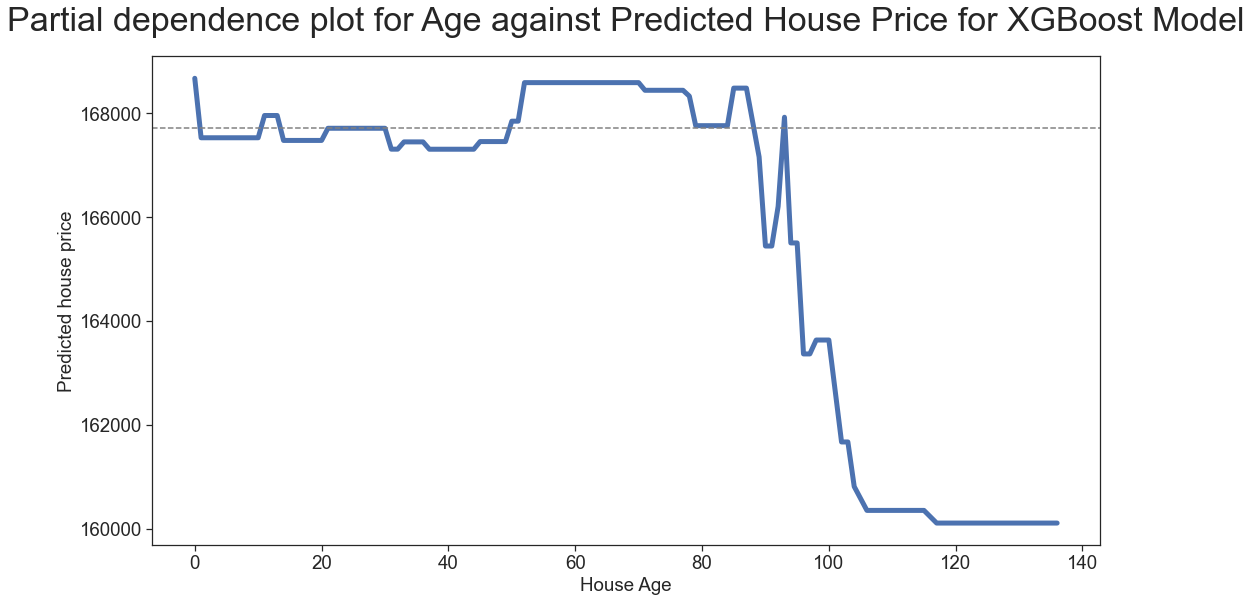

In [481]:
sns.lineplot(x='Age', y='Pdp', data=age_df, linewidth=5)
#plt.ylim(np.exp(12.015), np.exp(12.058))
plt.axhline(np.exp(np.mean(xmodel.predict(Xu_train))), color='gray',linestyle='dashed')
# plt.hlines(y=pdp_avg_near, xmin=-0.4, xmax=8.4,color='b',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_mid, xmin=8.6, xmax=15.4,color='orange',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_far, xmin=15.6, xmax=24.4,color='g',linestyle='solid',linewidth=2)
plt.ylabel('Predicted house price')
plt.xlabel('House Age')
plt.title('Partial dependence plot for Age against Predicted House Price for XGBoost Model')
#plt.show()

In [486]:
# manual PDP: FOR XGBoost
# https://lmc2179.github.io/posts/pdp.html

#age_values=X_pdp['AgeRemodAdd'].value_counts().index
pdp_values = []
for n in Xu_train['AgeRemodAdd']:
  X_pdp = Xu_train.copy()
  X_pdp['Age'] = n
  pdp_values.append(np.mean(xmodel.predict(X_pdp)))

In [487]:
ageremodadd_df= pd.DataFrame({'AgeRemodAdd':Xu_train['AgeRemodAdd'], 'Pdp':np.exp(pdp_values)})

Text(0.5, 1.0, 'Partial dependence plot for AgeRemodAdd against Predicted House Price for XGBoost Model')

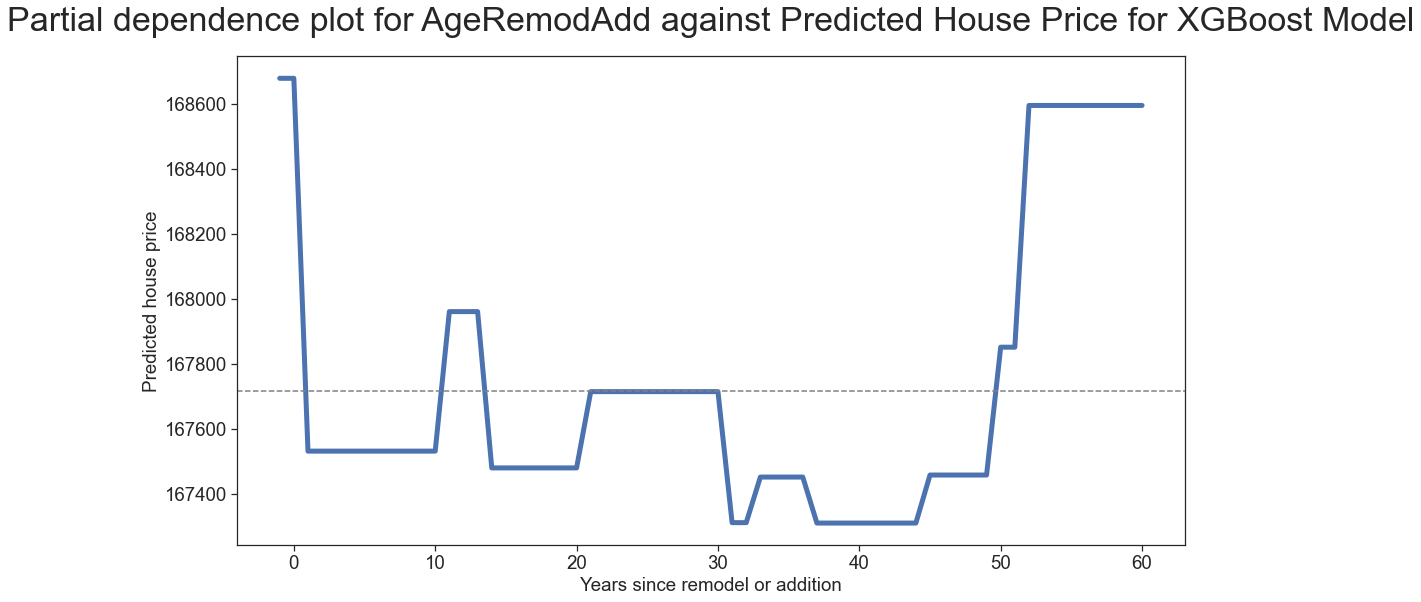

In [488]:
sns.lineplot(x='AgeRemodAdd', y='Pdp', data=ageremodadd_df, linewidth=5)
#plt.ylim(np.exp(12.015), np.exp(12.058))
plt.axhline(np.exp(np.mean(xmodel.predict(Xu_train))), color='gray',linestyle='dashed')
# plt.hlines(y=pdp_avg_near, xmin=-0.4, xmax=8.4,color='b',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_mid, xmin=8.6, xmax=15.4,color='orange',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_far, xmin=15.6, xmax=24.4,color='g',linestyle='solid',linewidth=2)
plt.ylabel('Predicted house price')
plt.xlabel('Years since remodel or addition')
plt.title('Partial dependence plot for AgeRemodAdd against Predicted House Price for XGBoost Model')
#plt.show()

In [491]:
import sklearn
echo sklearn.__version__

SyntaxError: invalid syntax (<ipython-input-491-11ca845b36a8>, line 2)

In [199]:
# manual PDP: FOR XGBoost with CV's
# https://lmc2179.github.io/posts/pdp.html

nei_values=range(0,25)
pdp_values = []
ci_hi=[]
ci_lo=[]
for n in nei_values:
  X_pdp = Xu_train.copy()
  X_pdp['Neighborhood'] = n
  pdp_values.append(np.mean(xmodel.predict(X_pdp)))
  ci_lo.append(np.percentile(xmodel.predict(X_pdp),2.5))
  ci_hi.append(np.percentile(xmodel.predict(X_pdp),97.5))   


In [200]:
nei_dist= [('far', 'Blmngtn'),
 ('mid', 'Blueste'),
 ('near', 'BrDale'),
 ('near', 'BrkSide'),
 ('near', 'ClearCr'),
 ('mid', 'CollgCr'),
 ('near', 'Crawfor'),
 ('near', 'Edwards'),
 ('far', 'Gilbert'),
 ('near', 'IDOTRR'),
 ('far', 'MeadowV'),
 ('far', 'Mitchel'),
 ('mid', 'NAmes'),
 ('far', 'NPkVill'),
 ('mid', 'NWAmes'),
 ('far', 'NoRidge'),
 ('far', 'NridgHt'),
 ('mid', 'OldTown'),
 ('near', 'SWISU'),
 ('near', 'Sawyer'),
 ('mid', 'SawyerW'),
 ('mid', 'Somerst'),
 ('far', 'StoneBr'),
 ('far', 'Timber'),
 ('near', 'Veenker')]

pdp_nei_df= pd.DataFrame({'Neighborhood':[x[1] for x in listNeighborhoods],
                          'Distance_ISU':[x[0] for x in nei_dist],
                          'Neighborhood_num':nei_values, 
                          'Pdp':np.exp(pdp_values),
                          'ci_lo':np.exp(ci_lo), 'ci_hi':np.exp(ci_hi)
                         })

In [368]:
pdp_nei_df

,Neighborhood,Distance_ISU,Neighborhood_num,Pdp
0,Blmngtn,far,0,170779.109375
1,Blueste,mid,1,170779.109375
2,BrDale,near,2,171998.921875
3,BrkSide,near,3,171998.921875
4,ClearCr,near,4,171998.921875
5,CollgCr,mid,5,170051.828125
6,Crawfor,near,6,171765.171875
7,Edwards,near,7,165766.328125
8,Gilbert,far,8,165693.296875
9,IDOTRR,near,9,165865.796875


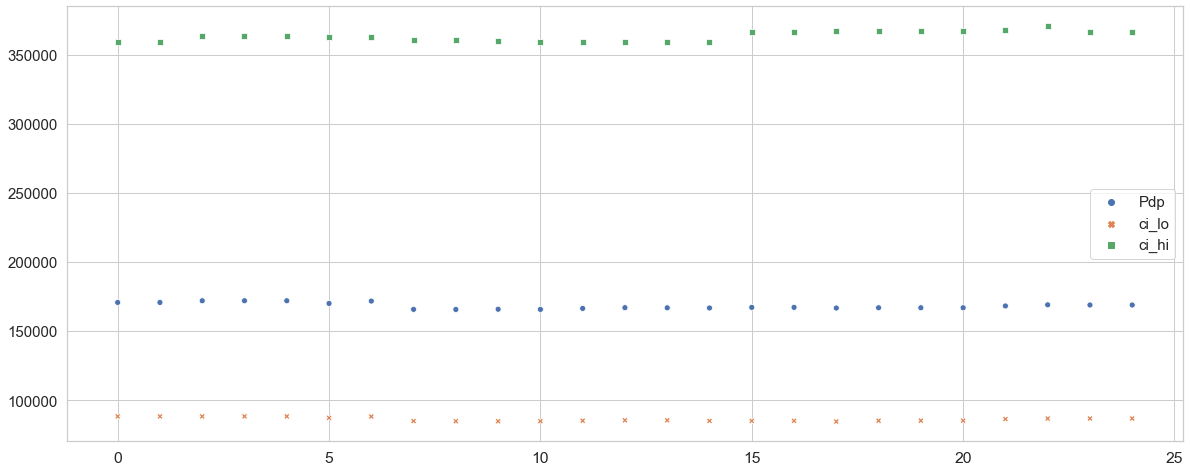

In [237]:
sns.scatterplot(data= pdp_nei_df[['Pdp','ci_lo', 'ci_hi']])

TypeError: scatter() got multiple values for argument 'x'

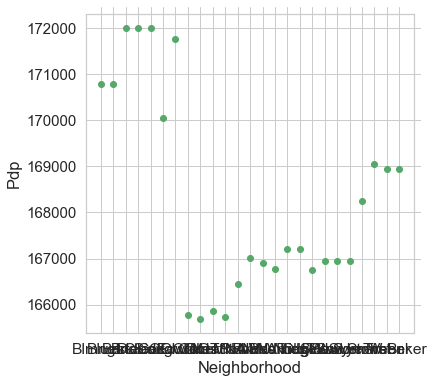

In [213]:
grid = sns.JointGrid(x='Neighborhood', y='Pdp', data=pdp_nei_df, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color='g')
#plt.scatter(x='Neighborhood', y='ci_lo', color='r')
grid.plot_joint(plt.scatter, x='Neighborhood', y='ci_lo', color='r')
#sns.boxplot(x='Neighborhood', y='Pdp', data=pdp_nei_df, hue='Distance_ISU')
#sns.scatterplot(x='Neighborhood', y='ci_lo', data=pdp_nei_df, hue='Distance_ISU')
#plt.ylim(np.exp(12.023), np.exp(12.0375))
plt.axhline(np.exp(np.mean(rfx.predict(Xu_train))), color='r',linestyle='dashed')
# plt.bar(nei_values, np.exp(pdp_values))
plt.xticks(nei_values, [x[1] for x in listNeighborhoods], rotation=45)
plt.ylabel('Predicted house price')
plt.xlabel('Neighborhood')
plt.title('Partial dependence plot for Neighborhood against Predicted House Price for Random Forest Model')
#plt.show()

In [126]:
plot_partial_dependence(rfx, Xu_train, ['Age'],  verbose=4, n_jobs=-1)

NameError: name 'rfx' is not defined

In [493]:
plot_partial_dependence(rfx, Xu_train, ['OverallQual'],  verbose=4, n_jobs=-1)

TypeError: plot_partial_dependence() got an unexpected keyword argument 'kind'

In [157]:
from pdpbox import pdp, info_plots

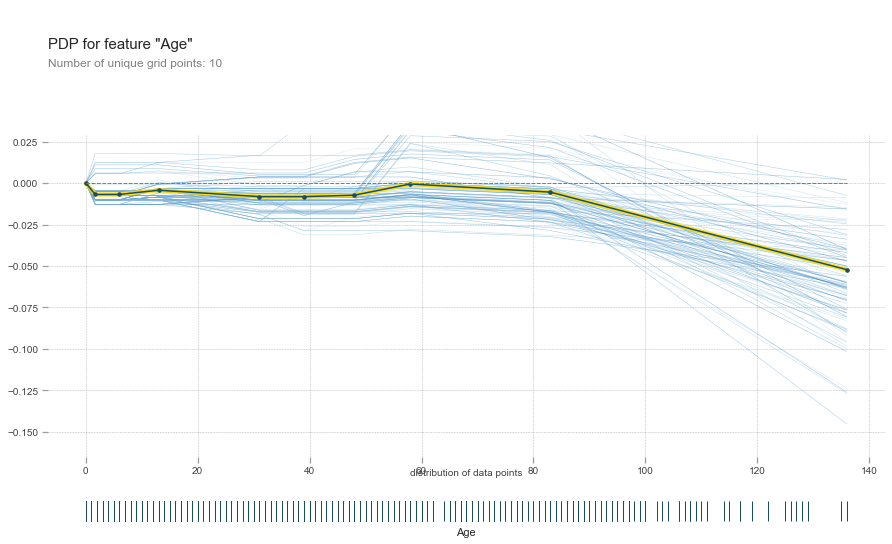

In [433]:

pdp_data_ = pdp.pdp_isolate(model=xmodel, dataset=Xu_train, feature='Age', model_features=Xu_train.columns)
pdp.pdp_plot(pdp_data_, 'Age',center=True, x_quantile=False,
                         ncols=3,
                         plot_lines=True,
                         frac_to_plot=100, plot_pts_dist=True, show_percentile=False)
plt.show()

In [71]:
fig, axes, summary_df= info_plots.target_plot(df=Xu_train['Neighborhood'], feature='Neighborhood', feature_name='Neighborhood',target=yu_train)


AttributeError: 'Series' object has no attribute 'columns'

In [166]:
Xu_train['AgeRemodAdd'].value_counts()

 0     99
 1     73
 4     46
 56    45
 3     43
 2     41
 5     39
 57    37
 9     33
 8     33
 6     32
 59    31
 7     30
 10    30
 58    28
 12    25
 31    23
 13    23
 11    23
 14    22
 39    19
 36    17
 16    17
 44    17
 37    16
 15    15
 53    14
 42    13
 47    13
 60    13
 33    12
 48    12
 45    12
 30    11
 40    11
 32    11
 29    11
 51    10
 49     9
 43     9
 19     9
 34     9
 18     9
 21     8
 41     8
 17     8
 22     8
 50     8
 35     8
 38     8
 46     7
 54     7
 27     7
 28     6
 20     6
 23     6
 24     6
 52     6
 26     5
 25     5
 55     5
-1      1
Name: AgeRemodAdd, dtype: int64

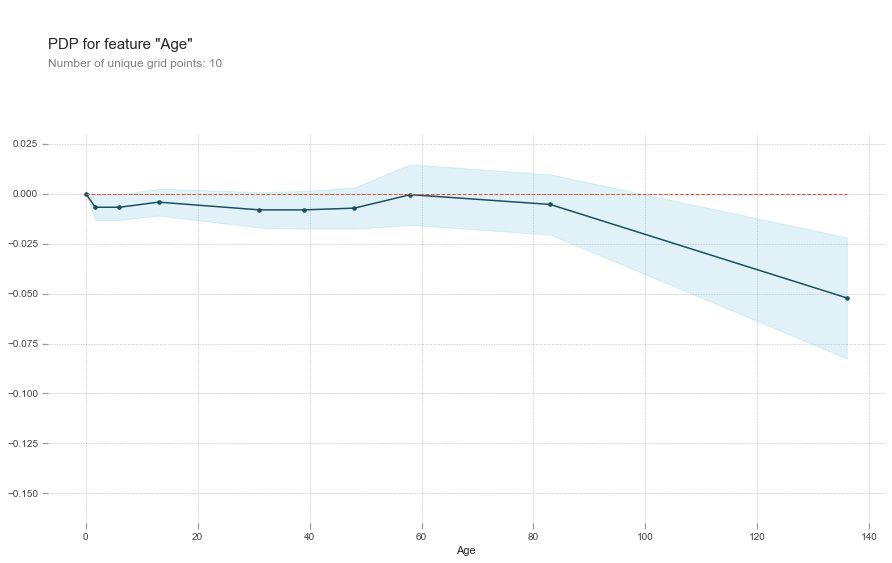

In [434]:
pdp_data_ = pdp.pdp_isolate(model=xmodel, dataset=Xu_train, feature='Age', model_features=Xu_train.columns)
pdp.pdp_plot(pdp_data_, 'Age')
plt.show()

In [28]:
Xu_train

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,GarageCond,SaleType,SaleCondition,LotFrontage,LotArea,OverallQual,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageFinish,GarageCars,GarageQual,Total_OutdoorSF,Baths,Age,AgeRemodAdd,AgeGarage
254,0,3,3,3,4,12,2,0,2,1,8,8,2,1,1,5,8,4,70.0,8400,5,0.0,3,3,1314,3,1,1314,3,5,0,2,1,3,250,2,53,53,53.0
1066,5,3,0,3,4,8,2,0,5,1,12,13,2,2,1,5,8,4,59.0,7837,6,0.0,4,4,799,4,1,1571,3,7,3,2,2,3,40,3,16,15,16.0
638,1,3,3,3,4,7,1,0,2,1,8,14,2,1,6,3,8,4,67.0,8777,5,0.0,3,2,796,4,1,796,3,4,0,0,0,0,492,1,98,58,0.0
799,4,3,3,3,0,18,1,0,0,1,13,14,1,0,5,5,8,4,60.0,7200,5,252.0,3,4,731,5,1,1768,4,7,3,1,1,3,264,3,70,57,68.0
380,4,3,3,3,4,18,2,0,0,1,3,14,2,0,5,5,8,4,50.0,5000,5,0.0,3,3,1026,3,1,1691,4,6,4,1,1,3,242,2,86,60,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,3,0,3,4,5,2,0,2,1,12,13,2,2,1,5,8,4,78.0,9317,6,0.0,4,4,1314,4,1,1314,4,6,4,2,2,3,22,2,1,1,1.0
1130,4,3,3,3,4,18,2,0,0,1,14,10,2,0,5,5,8,4,65.0,7804,4,0.0,3,3,1122,3,1,1981,4,7,3,1,2,3,475,3,81,59,28.0
1294,0,3,3,3,4,7,2,0,2,3,14,10,2,1,5,5,8,4,60.0,8172,5,0.0,3,3,864,3,1,864,3,5,0,1,2,3,0,2,51,16,49.0
860,4,3,3,3,0,6,2,0,0,1,13,14,2,0,5,5,8,4,55.0,7642,7,0.0,4,3,912,4,1,1426,4,7,4,1,1,3,240,2,89,9,82.0


### We have been provided with the feature list of 100 houses and will apply our best performing machine learning model to assign sale prices to these

In [328]:
test_undum_df.Age.value_counts()

 1      118
 0       52
 2       51
 5       36
 6       36
 4       35
 7       27
 9       26
 11      25
 52      24
 39      24
 3       24
 49      23
 13      22
 31      22
 44      22
 51      21
 30      21
 32      21
 43      20
 50      20
 42      19
 8       19
 10      18
 40      18
 55      18
 46      17
 48      17
 33      17
 53      17
 38      17
 12      17
 54      16
 35      16
 36      16
 34      15
 41      15
 68      15
 29      15
 56      15
 82      15
 17      14
 37      13
 14      13
 47      13
 45      13
 28      12
 86      12
 88      11
 87      11
 15      11
 61      11
 16      10
 81      10
 62      10
 23       9
 19       9
 58       9
 84       9
 69       9
 99       9
 60       9
 71       9
 70       9
 85       8
 59       8
 57       8
 67       7
 77       7
 98       7
 26       7
 80       7
 106      7
 76       6
 78       6
 18       6
 89       6
 90       6
 96       6
 93       6
 94       6
 22       5
 83       5
 63 

In [408]:
train = pd.read_csv('/Users/RK/Google Drive/NYC_DSA/Project3_ML/Kaggle_DS/house-prices-advanced-regression-techniques/train.csv')
train_sort= train.groupby('Neighborhood')['SalePrice'].mean().sort_values()

In [409]:
new_test=test_undum_df[test_undum_df.Age <= 1]
new_pred=xmodel.predict(new_test)
new_pred_df = pd.DataFrame({'Neighborhood_num':new_test['Neighborhood'],'Pred_SalePrice':np.exp(new_pred)})
new_pred_df['Neighborhood'] = list(new_pred_df.Neighborhood_num.replace([x[0] for x in listNeighborhoods], [x[1] for x in listNeighborhoods]))
new_pred_df['Distance_ISU']= list(new_pred_df.Neighborhood.replace([x[1] for x in nei_dist], [x[0] for x in nei_dist]))
new_pred_df.sort_values('Neighborhood')
new_pred_df.Neighborhood.value_counts()
#new_pred_df.sample(50).Neighborhood.value_counts()

NridgHt    42
Somerst    41
CollgCr    28
Gilbert    15
StoneBr    12
Timber     11
SawyerW    10
Blmngtn     4
Crawfor     3
Edwards     3
OldTown     1
Mitchel     1
Name: Neighborhood, dtype: int64

In [410]:
new_pred_df.Neighborhood.value_counts().index

Index(['NridgHt', 'Somerst', 'CollgCr', 'Gilbert', 'StoneBr', 'Timber',
       'SawyerW', 'Blmngtn', 'Crawfor', 'Edwards', 'OldTown', 'Mitchel'],
      dtype='object')

In [411]:
nei_order_corr2=['Crawfor','Edwards','CollgCr', 'OldTown','SawyerW','Somerst', 'Blmngtn', 'Gilbert',  'Mitchel','NridgHt', 'StoneBr', 'Timber'
         ]
nei_order_corr_near2= ['Crawfor','Edwards']
nei_order_corr_mid2= ['CollgCr', 'OldTown','SawyerW','Somerst']
nei_order_corr_far2= ['Blmngtn', 'Gilbert',  'Mitchel','NridgHt', 'StoneBr', 'Timber']

pdp_avg_near2= new_pred_df[new_pred_df["Neighborhood"].isin(nei_order_corr_near2)]['Pred_SalePrice'].mean()
pdp_avg_mid2= new_pred_df[new_pred_df["Neighborhood"].isin(nei_order_corr_mid2)]['Pred_SalePrice'].mean()
pdp_avg_far2= new_pred_df[new_pred_df["Neighborhood"].isin(nei_order_corr_far2)]['Pred_SalePrice'].mean()

In [413]:
sns.violinplot(x='Neighborhood', y='Pred_SalePrice', data=new_pred_df,  hue='Distance_ISU', dodge=False, 
            hue_order=["near", "mid","far"], order=nei_order.corr2)
           
#plt.ylim(np.exp(12.015), np.exp(12.058))
plt.axhline(np.exp(np.mean(xmodel.predict(new_test))), color='gray',linestyle='dashed')
plt.hlines(y=pdp_avg_near2, xmin=-0.4, xmax=1.5,color='b',linestyle='solid',linewidth=2)
plt.hlines(y=pdp_avg_mid2, xmin=1.6, xmax=5.4,color='orange',linestyle='solid',linewidth=2)
plt.hlines(y=pdp_avg_far2, xmin=5.6, xmax=11.5,color='g',linestyle='solid',linewidth=2)
# plt.xticks(nei_values, nei_order.corr, rotation=45)
plt.legend(loc='upper left')


#ach neighborhood group...
#maxes=new_pred_df.groupby(['Neighborhood'])['Pred_SalePrice'].max().values
nobs=new_pred_df.Neighborhood.value_counts().sort_index(ascending=True).values
nobs = [str(x) for x in nobs.tolist()]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], 0, nobs[tick], horizontalalignment='center', 
               size='large', color='k', weight='semibold')

plt.ylabel('Predicted house price')
plt.xlabel('Neighborhood')
plt.title('New Home Average Predicted Sale Prices by Neighborhood Based on XGBoost Model')

AttributeError: 'Series' object has no attribute 'corr2'

In [414]:
size=17
params = {'legend.fontsize': 'large',
          'figure.figsize': (17,9),
          'axes.titlesize': size*2,
          'axes.labelsize': size*1.1,
          'xtick.labelsize': size*1.1,
          'ytick.labelsize': size*1.1,
          'axes.titlepad': 25,
          'figure.titlesize': size*2,
          'legend.fontsize': size,
            'legend.title_fontsize': size}

plt.rcParams.update(params)

sns.set_style("whitegrid")

In [415]:
new_pred_df=new_pred_df.sort_values('Neighborhood')

In [416]:
new_pred_df

,Neighborhood_num,Pred_SalePrice,Neighborhood,Distance_ISU
1214,0,170472.859375,Blmngtn,far
526,0,181610.421875,Blmngtn,far
861,0,189133.328125,Blmngtn,far
1211,0,197828.562500,Blmngtn,far
1369,5,232136.000000,CollgCr,mid
404,5,326033.218750,CollgCr,mid
405,5,329484.968750,CollgCr,mid
406,5,236423.890625,CollgCr,mid
409,5,218806.750000,CollgCr,mid
1370,5,160967.437500,CollgCr,mid


In [417]:
new_pred_df['Neighborhood'].value_counts().index

Index(['NridgHt', 'Somerst', 'CollgCr', 'Gilbert', 'StoneBr', 'Timber',
       'SawyerW', 'Blmngtn', 'Crawfor', 'Edwards', 'OldTown', 'Mitchel'],
      dtype='object')

In [418]:
pd.Series(nei_list1)

0     Mitchel
1     OldTown
2     SawyerW
3     Edwards
4     Blmngtn
5     Gilbert
6     CollgCr
7     Somerst
8      Timber
9     Crawfor
10    NridgHt
11    StoneBr
dtype: object

In [419]:
nei_list1= ['Mitchel','OldTown', 'SawyerW', 'Edwards', 'Blmngtn', 'Gilbert', 'CollgCr',
       'Somerst', 'Timber', 'Crawfor', 'NridgHt', 'StoneBr']

In [420]:
new_test=test_undum_df[test_undum_df.Age <= 2]
new_pred=xmodel.predict(new_test)
new_pred_df = pd.DataFrame({'Neighborhood_num':new_test['Neighborhood'],'Pred_SalePrice':np.exp(new_pred)})
new_pred_df['Neighborhood'] = list(new_pred_df.Neighborhood_num.replace([x[0] for x in listNeighborhoods], [x[1] for x in listNeighborhoods]))
new_pred_df['Distance_ISU']= list(new_pred_df.Neighborhood.replace([x[1] for x in nei_dist], [x[0] for x in nei_dist]))
new_pred_df['Pred_Act'] = "Predicted"

In [421]:
new_pred_df = new_pred_df.set_index('Neighborhood')
new_pred_df_sort= new_pred_df.loc[nei_list1]
new_pred_df_sort = new_pred_df_sort.reset_index()

In [422]:
new_test.shape

(222, 39)

In [423]:
new_train_real=train_undum_df[train_undum_df.Age <= 2]
new_train_real.shape

(203, 40)

In [424]:
new_train_real=new_train_real[["Neighborhood","SalePrice"]]
#164

new_train_real['Neighborhood_name'] = list(new_train_real.Neighborhood.replace([x[0] for x in listNeighborhoods], [x[1] for x in listNeighborhoods]))
new_train_real['Pred_Act'] = "Actual"


nei_list2= ['Mitchel', 'SawyerW', 'Edwards', 'Blmngtn', 'Gilbert', 'CollgCr',
       'Somerst', 'Timber', 'Crawfor', 'NridgHt', 'StoneBr']


new_train_real = new_train_real.set_index('Neighborhood_name')
new_train_real= new_train_real.loc[nei_list2]
new_train_real = new_train_real.reset_index()

In [425]:
new_train_real

,Neighborhood_name,Neighborhood,SalePrice,Pred_Act
0,Mitchel,11,147000,Actual
1,Mitchel,11,84500,Actual
2,SawyerW,20,158000,Actual
3,SawyerW,20,142500,Actual
4,Edwards,7,155000,Actual
5,Edwards,7,130000,Actual
6,Edwards,7,130000,Actual
7,Edwards,7,186000,Actual
8,Edwards,7,184750,Actual
9,Edwards,7,320000,Actual


In [426]:
new_pred_df_sort

,Neighborhood,Neighborhood_num,Pred_SalePrice,Distance_ISU,Pred_Act
0,Mitchel,11,107447.414062,far,Predicted
1,OldTown,17,106735.164062,mid,Predicted
2,SawyerW,20,175287.125000,mid,Predicted
3,SawyerW,20,200815.750000,mid,Predicted
4,SawyerW,20,184478.109375,mid,Predicted
5,SawyerW,20,132524.812500,mid,Predicted
6,SawyerW,20,146284.781250,mid,Predicted
7,SawyerW,20,197287.093750,mid,Predicted
8,SawyerW,20,132210.859375,mid,Predicted
9,SawyerW,20,202287.140625,mid,Predicted


Text(0.5, 1.0, 'New Home Predicted Values Based on XGBoost Model')

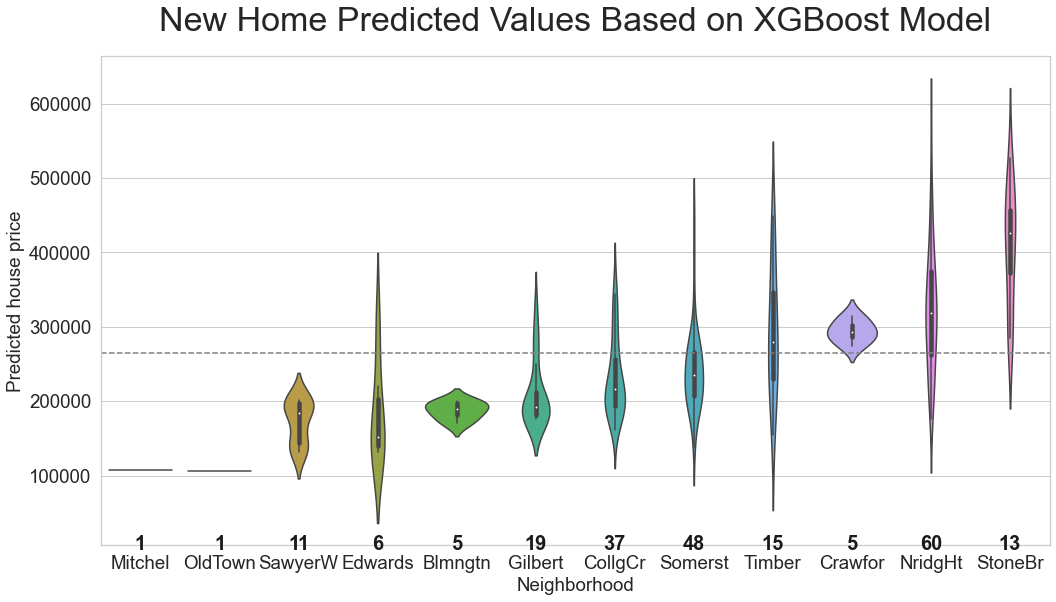

In [427]:
ax=sns.violinplot(x='Neighborhood', y='Pred_SalePrice', data=new_pred_df_sort)
           
#plt.ylim(np.exp(12.015), np.exp(12.058))
plt.axhline(np.mean(new_pred_df_sort.Pred_SalePrice), color='gray',linestyle='dashed')
# plt.hlines(y=pdp_avg_near2, xmin=-0.4, xmax=1.5,color='b',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_mid2, xmin=1.6, xmax=5.4,color='orange',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_far2, xmin=5.6, xmax=11.5,color='g',linestyle='solid',linewidth=2)
# plt.xticks(nei_values, nei_order.corr, rotation=45)


nobs = new_pred_df_sort.groupby('Neighborhood', sort=False).count()['Pred_SalePrice'] # identify unique, but maintain order and value count
nobs = [str(x) for x in nobs.tolist()]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], 0, nobs[tick], horizontalalignment='center', 
               size=20, color='k', weight='semibold')

plt.ylabel('Predicted house price')
plt.xlabel('Neighborhood')
plt.title('New Home Predicted Values Based on XGBoost Model')

In [428]:
# drop 'oldtown' as only one entry
new_pred_df_sort=new_pred_df_sort[new_pred_df_sort['Neighborhood']!='OldTown']

# concat Acutal and Predicted dataframe of new houses
new_pred_df_sort = new_pred_df_sort.rename(columns={"Neighborhood": "Neighborhood_name", "Pred_SalePrice": "SalePrice"})
cols = ["Neighborhood_name", 'SalePrice','Pred_Act']
new_concat= pd.concat( [new_train_real[cols] , new_pred_df_sort[cols]])

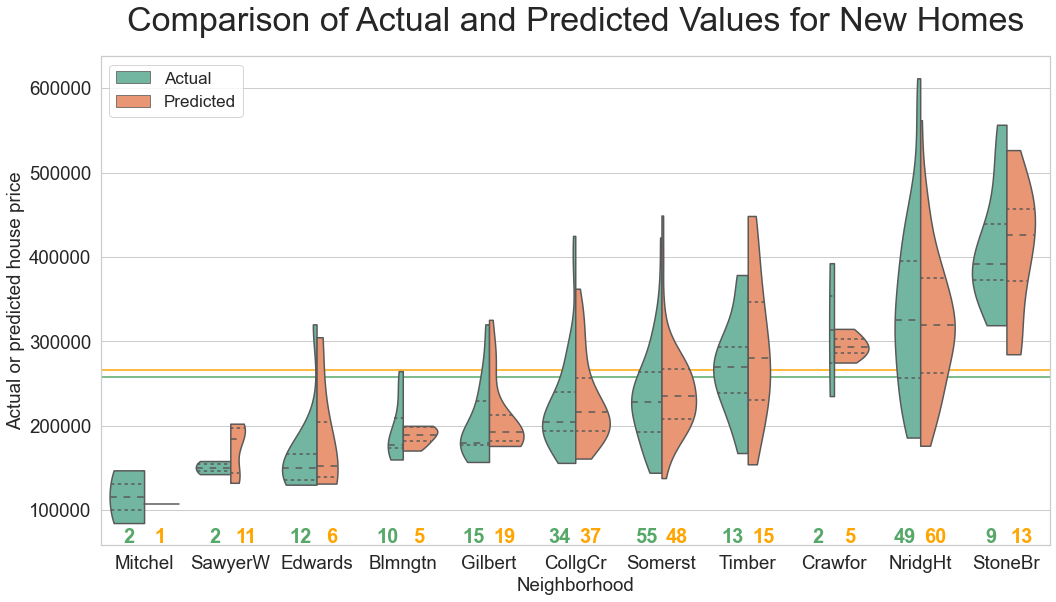

In [435]:
toplot=sns.violinplot(x='Neighborhood_name', y='SalePrice', data=new_concat, hue= "Pred_Act", split=True, palette="Set2", 
                  inner="quartiles", cut=0, zorder=1000)
toplot.legend_.set_title(None)
ax= plt.gca()           
#plt.ylim(np.exp(12.015), np.exp(12.058))
plt.axhline(np.mean(new_train_real.SalePrice), color='g',linestyle='solid',zorder=-1)
plt.axhline(np.mean(new_pred_df_sort.SalePrice), color='orange',linestyle='solid', zorder=-2)           
# plt.hlines(y=pdp_avg_near2, xmin=-0.4, xmax=1.5,color='b',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_mid2, xmin=1.6, xmax=5.4,color='orange',linestyle='solid',linewidth=2)
# plt.hlines(y=pdp_avg_far2, xmin=5.6, xmax=11.5,color='g',linestyle='solid',linewidth=2)
# plt.xticks(nei_values, nei_order.corr, rotation=45)

nobs = new_train_real.groupby('Neighborhood_name', sort=False).count()['SalePrice'] # identify unique, but maintain order and value count
nobs = [str(x) for x in nobs.tolist()]
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick]-0.18, 61000, nobs[tick], horizontalalignment='center', 
               size=20, color='g', weight='semibold')

nobs = new_pred_df_sort.groupby('Neighborhood_name', sort=False).count()['SalePrice'] # identify unique, but maintain order and value count
nobs = [str(x) for x in nobs.tolist()]
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick]+0.18, 61000, nobs[tick], horizontalalignment='center', 
               size=20, color='orange', weight='semibold')

plt.legend(loc='upper left')
plt.ylabel('Actual or predicted house price')
plt.xlabel('Neighborhood')
plt.title('Comparison of Actual and Predicted Values for New Homes')
plt.savefig("PredictActualCompare.png")

In [430]:
pwd

'/Users/RK/Google Drive/NYC_DSA/Project3_ML/Housing_Price_Prediction/Ryan_K'

In [406]:
print(np.mean(new_train_real.SalePrice))
print(np.mean(new_pred_df_sort.SalePrice))

257701.52216748768
266133.34375


In [367]:
new_concat.groupby('Neighborhood_name')['SalePrice'].mean().sort_values().index

Index(['Mitchel', 'SawyerW', 'Edwards', 'Blmngtn', 'Gilbert', 'CollgCr',
       'Somerst', 'Timber', 'Crawfor', 'NridgHt', 'StoneBr'],
      dtype='object', name='Neighborhood_name')

(array([ 1.,  6.,  3., 37., 27., 27., 30., 20., 13.,  6.]),
 array([11.584757 , 11.743692 , 11.902629 , 12.061565 , 12.220501 ,
        12.3794365, 12.538373 , 12.6973095, 12.856245 , 13.015181 ,
        13.174117 ], dtype=float32),
 <a list of 10 Patch objects>)

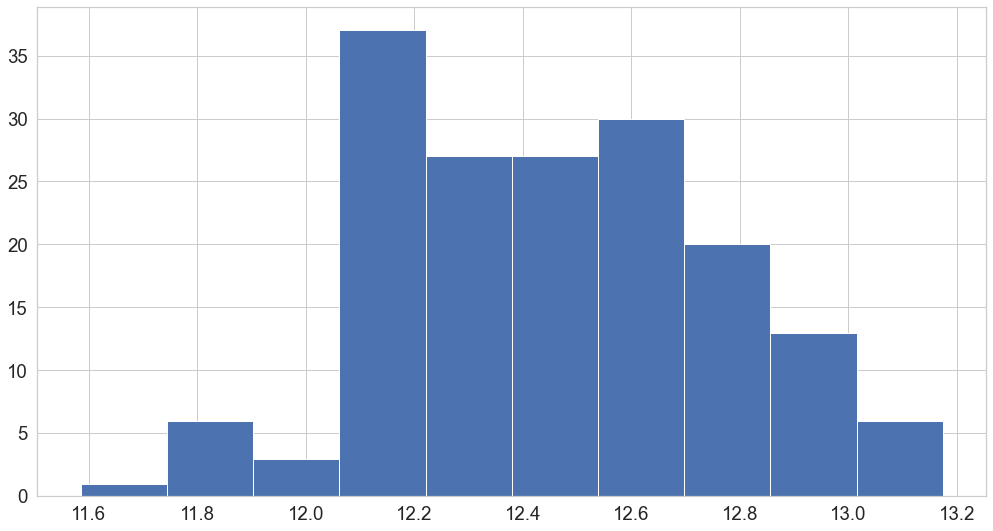

In [391]:
plt.hist(np.log(new_pred_df_sort['SalePrice']))

(array([ 1.,  0.,  9., 28., 33., 36., 22., 19., 11.,  5.]),
 array([11.34450681, 11.54244883, 11.74039084, 11.93833285, 12.13627487,
        12.33421688, 12.53215889, 12.73010091, 12.92804292, 13.12598493,
        13.32392695]),
 <a list of 10 Patch objects>)

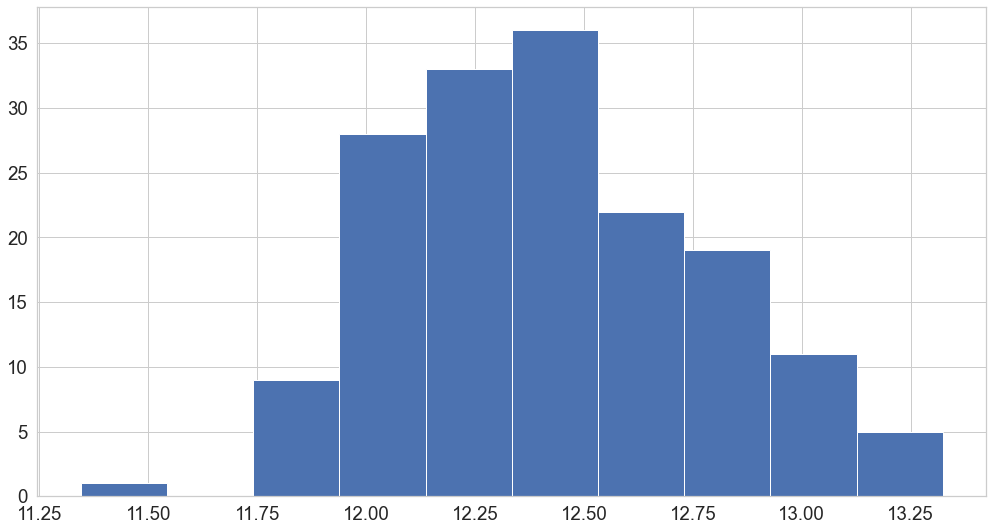

In [392]:
plt.hist(np.log(new_train_real['SalePrice']))

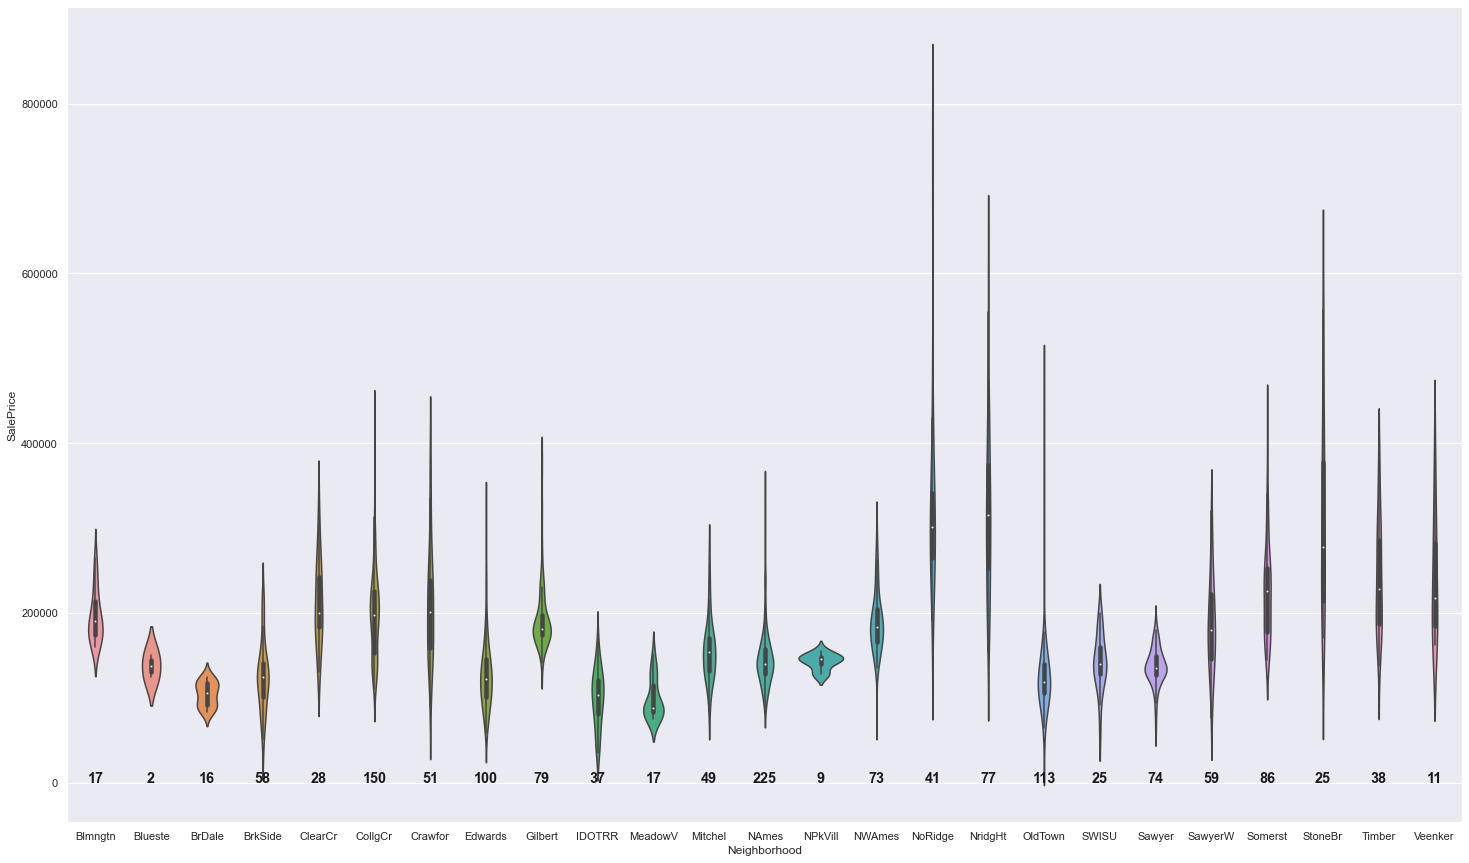

In [69]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(25,15)})

ax= sns.violinplot('Neighborhood','SalePrice', data=train, order=train.Neighborhood.value_counts().sort_index(ascending=True).index)

maxes=train.groupby(['Neighborhood'])['SalePrice'].max().values
nobs=train.Neighborhood.value_counts().sort_index(ascending=True).values
nobs = [str(x) for x in nobs.tolist()]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], 0, nobs[tick], horizontalalignment='center', 
               size='large', color='k', weight='semibold')

In [11]:
new_test=test_undum_df[test_undum_df.Age <= 1]
new_pred=xmodel.predict(new_test)

In [14]:
new_test

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,GarageCond,SaleType,SaleCondition,LotFrontage,LotArea,OverallQual,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageFinish,GarageCars,GarageQual,Total_OutdoorSF,Baths,Age,AgeRemodAdd,AgeGarage
15,5,3,0,3,4,16,2,0,4,1,10,12,3,2,1,5,6,5,102.000000,12858,9,162.0,5,5,1590.0,5,1,2334,5,10,4,3,3.0,3,277,3.0,1,0,1.0
16,0,3,0,3,0,16,2,0,2,1,10,12,3,2,1,5,6,5,94.000000,12883,8,256.0,4,4,1544.0,5,1,1544,4,7,0,2,3.0,3,35,2.0,1,0,1.0
28,0,1,3,3,4,21,2,0,2,3,10,12,2,2,1,5,6,5,92.000000,9215,7,0.0,4,4,1218.0,5,1,1218,4,4,0,2,2.0,3,136,2.0,1,0,1.0
42,0,1,0,3,4,21,2,0,2,1,5,5,2,2,1,5,6,5,57.000000,12853,8,0.0,4,5,1642.0,5,1,1418,4,6,4,2,3.0,3,576,3.0,0,0,0.0
112,0,3,1,3,4,7,2,0,2,1,10,12,3,2,1,5,2,5,44.000000,17485,7,96.0,4,4,1508.0,5,1,1508,4,5,3,2,2.0,3,0,2.0,1,0,1.0
116,0,3,3,3,4,5,2,0,2,1,10,12,3,2,1,5,8,4,64.000000,7360,7,80.0,4,4,1222.0,5,1,1222,4,6,0,2,2.0,3,54,2.0,0,0,1.0
148,0,3,3,3,4,23,2,0,2,1,10,12,2,2,1,5,6,5,73.000000,9803,7,0.0,4,4,1214.0,5,1,1214,4,6,0,2,2.0,3,25,2.0,1,0,0.0
201,5,3,3,3,4,16,2,0,4,1,10,12,2,2,1,5,6,5,95.000000,12350,9,0.0,4,5,1365.0,5,1,2690,5,8,4,2,3.0,3,197,4.0,0,0,0.0
202,0,3,3,3,4,16,2,0,2,3,10,12,3,2,1,5,8,4,95.000000,12350,9,450.0,5,5,2020.0,5,1,2020,5,7,4,2,3.0,3,290,3.0,1,1,1.0
204,0,3,3,3,4,16,2,0,2,1,10,12,3,2,1,5,8,4,95.000000,11578,9,302.0,5,5,1736.0,5,1,1736,5,7,4,2,3.0,3,409,2.0,1,1,1.0


In [16]:
new_pred_df = pd.DataFrame({'MSSubClass_num':new_test['MSSubClass'],
                            'Condition1_num':new_test['Condition1'],
                            'Age':new_test['Age'],
                            'AgeRemodAdd':new_test['AgeRemodAdd'],
                            'Pred_SalePrice':np.exp(new_pred)})
#new_pred_df['Neighborhood'] = list(new_pred_df.Neighborhood_num.replace([x[0] for x in listNeighborhoods], [x[1] for x in listNeighborhoods]))
#new_pred_df['Distance_ISU']= list(new_pred_df.Neighborhood.replace([x[1] for x in nei_dist], [x[0] for x in nei_dist]))

In [22]:
new_pred_df.MSSubClass_num.value_counts()

0     90
5     55
11    23
13     2
14     1
Name: MSSubClass_num, dtype: int64

In [18]:
listMSSubClass= [(5, 60),
 (0, 20),
 (1, 30),
 (14, 190),
 (13, 180),
 (3, 45),
 (8, 80),
 (4, 50),
 (10, 90),
 (9, 85),
 (12, 160),
 (11, 120),
 (6, 70),
 (2, 40),
 (7, 75)]

In [ ]:
listCondition1=[(6, 'RRAn'),
 (1, 'Feedr'),
 (4, 'PosN'),
 (7, 'RRNe'),
 (3, 'PosA'),
 (8, 'RRNn'),
 (0, 'Artery'),
 (2, 'Norm'),
 (5, 'RRAe')]